In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [2]:
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

In [3]:
import warnings
warnings.filterwarnings(action='once')
# 设置警告只出现一次
# 不出现设置: warnings.filterwarnings('ignore')

In [4]:
plt.rcParams['font.sans-serif'] = 'simsun'
plt.rcParams['axes.unicode_minus'] = False

In [5]:
from matplotlib import font_manager as fm

font = fm.FontProperties(fname=r'C:\Windows\Fonts\simsun.ttc')

In [6]:
os.chdir('.')

In [9]:
data = pd.read_excel(r'.\data\酒类销售数据.xlsx')
data.head()

,ID,商品名称,价格（元）,近30天销量（件）,广告词,促销活动,评论数,商品链接,日期,品牌
0,537013830676,江小白品鉴酒更多优惠请见详情页非卖品请勿下单！,29.0,121,单纯高粱酿造 精制包装 特色语录,NaN,67514.0,https://chaoshi.detail.tmall.com/item.htm?id=5...,2018-02-27,江小白
1,525501233363,牛栏山 46度二锅头500mL*12整箱（绿瓶）装 清香型,78.0,8027,正宗牛栏山 地道北京味,NaN,26144.0,https://chaoshi.detail.tmall.com/item.htm?id=5...,2018-02-27,牛栏山
2,540011154689,泸州老窖 泸州原浆柔和 52度 500mL 白酒浓香型,20.0,3116,NaN,NaN,25921.0,https://chaoshi.detail.tmall.com/item.htm?id=5...,2018-02-27,泸州老窖
3,43211682074,红星二锅头酒大二绿瓶56度 500ml清香型白酒酒厂直供,13.0,8703,整箱原厂包装 见详情链接,满99元减10元,22575.0,https://chaoshi.detail.tmall.com/item.htm?id=4...,2018-02-27,红星
4,521710025064,52度洋河海之蓝 480mlx2瓶 绵柔型白酒 猫超配送 酒厂直供,326.0,7165,不参与天猫超市任何优惠券活动,NaN,21535.0,https://chaoshi.detail.tmall.com/item.htm?id=5...,2018-02-27,洋河


In [8]:
data.columns

Index(['ID', '商品名称', '价格（元）', '近30天销量（件）', '广告词', '促销活动', '评论数', '商品链接', '日期',
       '品牌'],
      dtype='object')

In [8]:
data2 = data[['商品名称','价格（元）','近30天销量（件）','广告词', '促销活动', '评论数','日期','品牌']]
data2.head(10)

,商品名称,价格（元）,近30天销量（件）,广告词,促销活动,评论数,日期,品牌
0,江小白品鉴酒更多优惠请见详情页非卖品请勿下单！,29.0,121,单纯高粱酿造 精制包装 特色语录,NaN,67514.0,2018-02-27,江小白
1,牛栏山 46度二锅头500mL*12整箱（绿瓶）装 清香型,78.0,8027,正宗牛栏山 地道北京味,NaN,26144.0,2018-02-27,牛栏山
2,泸州老窖 泸州原浆柔和 52度 500mL 白酒浓香型,20.0,3116,NaN,NaN,25921.0,2018-02-27,泸州老窖
3,红星二锅头酒大二绿瓶56度 500ml清香型白酒酒厂直供,13.0,8703,整箱原厂包装 见详情链接,满99元减10元,22575.0,2018-02-27,红星
4,52度洋河海之蓝 480mlx2瓶 绵柔型白酒 猫超配送 酒厂直供,326.0,7165,不参与天猫超市任何优惠券活动,NaN,21535.0,2018-02-27,洋河
5,江小白白酒清香型40度Se.100ml*6瓶整箱装高粱酒,108.0,14547,酒厂直营 正品保证 百城次日达,满189元送任意1件赠品（赠完即止）；满229元送任意1…,21178.0,2018-02-27,江小白
6,江小白白酒清香型40度Se.100ml*6瓶整箱装高粱酒,108.0,14547,酒厂直营 正品保证 百城次日达,满189元送任意1件赠品（赠完即止）；满229元送任意1…,21178.0,2018-02-27,江小白
7,红星二锅头酒大二绿瓶56度 500ml*12白酒酒厂直供,139.0,4568,红星实惠口粮酒,NaN,21046.0,2018-02-27,红星
8,42度牛栏山二锅头陈酿500ml*12支 整箱装 白牛二,168.0,4218,正宗牛栏山 地道北京味 整箱正品,NaN,20908.0,2018-02-27,牛栏山
9,【天猫超市】五粮液股份公司 纳福彰显尊贵 精品级52度500mL白酒,49.0,534,NaN,NaN,20568.0,2018-02-27,五粮液


## 数据探索

In [32]:
data2.shape

(8141, 8)

In [21]:
data2.describe().T

,count,mean,std,min,25%,50%,75%,max
价格（元）,8139.0,397.562531,639.793395,0.0,99.9,198.0,399.0,11512.8
近30天销量（件）,8141.0,335.266798,1122.819803,0.0,15.0,56.0,208.0,26620.0
评论数,7081.0,1148.968084,3282.763239,0.0,47.0,203.0,825.0,67514.0


In [19]:
jxb = data2[data2.品牌 == '江小白']
jxb
# 江小白每个月份的销售额
jxb.groupby('商品名称',axis=0).agg({'商品名称':len})
# jxb[jxb['商品名称'] == '【天猫超市】江小白国产白酒天生自由轻度酒礼盒500ml高粱粮食酒']

,商品名称,价格（元）,近30天销量（件）,广告词,促销活动,评论数,日期,品牌
0,江小白品鉴酒更多优惠请见详情页非卖品请勿下单！,29.0,121,单纯高粱酿造 精制包装 特色语录,NaN,67514.0,2018-02-27,江小白
5,江小白白酒清香型40度Se.100ml*6瓶整箱装高粱酒,108.0,14547,酒厂直营 正品保证 百城次日达,满189元送任意1件赠品（赠完即止）；满229元送任意1…,21178.0,2018-02-27,江小白
6,江小白白酒清香型40度Se.100ml*6瓶整箱装高粱酒,108.0,14547,酒厂直营 正品保证 百城次日达,满189元送任意1件赠品（赠完即止）；满229元送任意1…,21178.0,2018-02-27,江小白
35,江小白白酒清香型45度125ml*2瓶礼盒装小瓶高粱酒,66.0,2213,单纯高粱酿造 口感纯净 特色语录,NaN,8562.0,2018-02-27,江小白
44,江小白白酒清香型40度Se.100ml*12瓶整箱粮食高粱酒,216.0,3280,酒厂直营 正品保证 百城次日达,NaN,7242.0,2018-02-27,江小白
...,...,...,...,...,...,...,...,...
7699,【天猫超市】江小白国产白酒青春版40度500ml单瓶高粱粮食酒,79.0,243,纯高粱酿造 入口柔和 口感纯净 回味甘甜,NaN,310.0,2017-05-24,江小白
7799,【天猫超市】江小白国产白酒脱单版清香型45度 125ml*4瓶礼盒装,79.0,83,单纯高粱酿造 口感纯净 特色语录,NaN,134.0,2017-05-24,江小白
7812,【天猫超市】江小白国产白酒天生自由轻度酒礼盒500ml高粱粮食酒,109.0,30,纯高粱酿造 轻度酒礼盒装 口感纯净,"满199元减10元,送任意1件赠品（赠完即止）",124.0,2017-05-24,江小白
7893,【天猫超市】江小白纯粮食白酒礼盒装300ml*12瓶整箱酒水送礼佳品,439.0,55,送礼佳品 聚会推荐 口感纯净 回味甘甜 纯高粱酒,"满1件,送任意1件赠品（赠完即止）",74.0,2017-05-24,江小白


,商品名称
商品名称,
【天猫超市】江小白国产白酒天生自由轻度酒礼盒500ml高粱粮食酒,3
【天猫超市】江小白国产白酒条形装清香型45度 125ml*4瓶礼盒装,1
【天猫超市】江小白国产白酒脱单版清香型45度 125ml*4瓶礼盒装,3
【天猫超市】江小白国产白酒青春版40度500ml单瓶高粱粮食酒,4
【天猫超市】江小白小瓶白酒礼盒装好先生45度125ml*4瓶纯粮食酒,3
【天猫超市】江小白清香型国产白酒JOYYOUTH150ml*6白酒整箱特价,1
【天猫超市】江小白清香型白酒45度125ml*8瓶整箱装粮食酒小酒,1
【天猫超市】江小白清香型白酒JOYYOUTH500ml*4粮食高粱酒整箱,1
【天猫超市】江小白白酒 迷你小酒更多优惠请见详情页非卖品,2


## 缺失值分布情况

In [22]:
(data2.isna().sum() / len(data2)).apply(lambda x: '{:.5f}'.format(x))
# (data2.isnull().sum() / len(data2)) # 同上

商品名称         0.00000
价格（元）        0.00025
近30天销量（件）    0.00000
广告词          0.41958
促销活动         0.49016
评论数          0.13035
日期           0.00000
品牌           0.00000
dtype: object

In [58]:
#去重复值
data2 = data2.drop_duplicates().reset_index().drop("index", axis=1)
data2.shape

(8132, 8)

In [59]:
data2.head(10)

,商品名称,价格（元）,近30天销量（件）,广告词,促销活动,评论数,日期,品牌
0,江小白品鉴酒更多优惠请见详情页非卖品请勿下单！,29.0,121,单纯高粱酿造 精制包装 特色语录,NaN,67514.0,2018-02-27,江小白
1,牛栏山 46度二锅头500mL*12整箱（绿瓶）装 清香型,78.0,8027,正宗牛栏山 地道北京味,NaN,26144.0,2018-02-27,牛栏山
2,泸州老窖 泸州原浆柔和 52度 500mL 白酒浓香型,20.0,3116,NaN,NaN,25921.0,2018-02-27,泸州老窖
3,红星二锅头酒大二绿瓶56度 500ml清香型白酒酒厂直供,13.0,8703,整箱原厂包装 见详情链接,满99元减10元,22575.0,2018-02-27,红星
4,52度洋河海之蓝 480mlx2瓶 绵柔型白酒 猫超配送 酒厂直供,326.0,7165,不参与天猫超市任何优惠券活动,NaN,21535.0,2018-02-27,洋河
5,江小白白酒清香型40度Se.100ml*6瓶整箱装高粱酒,108.0,14547,酒厂直营 正品保证 百城次日达,满189元送任意1件赠品（赠完即止）；满229元送任意1…,21178.0,2018-02-27,江小白
6,红星二锅头酒大二绿瓶56度 500ml*12白酒酒厂直供,139.0,4568,红星实惠口粮酒,NaN,21046.0,2018-02-27,红星
7,42度牛栏山二锅头陈酿500ml*12支 整箱装 白牛二,168.0,4218,正宗牛栏山 地道北京味 整箱正品,NaN,20908.0,2018-02-27,牛栏山
8,【天猫超市】五粮液股份公司 纳福彰显尊贵 精品级52度500mL白酒,49.0,534,NaN,NaN,20568.0,2018-02-27,五粮液
9,五粮液股份公司 五星A级上品 52度 500ml 浓香型白酒,138.0,11535,需要多个 礼品袋 请拍2瓶装,满2件5折送任意1件赠品（赠完即止）,20506.0,2018-02-27,五粮液


In [60]:
# data2.describe(include="all")
data2.describe().T

mean = data2.describe().T.loc['评论数',:]['mean']

,count,mean,std,min,25%,50%,75%,max
价格（元）,8130.0,397.616905,639.885985,0.0,99.9,198.0,399.00,11512.8
近30天销量（件）,8132.0,331.084112,1102.149849,0.0,15.0,56.0,206.25,26620.0
评论数,7072.0,1140.644796,3266.645463,0.0,47.0,203.0,822.00,67514.0


## 缺失值填补

In [98]:
# 填补缺失值（评论数）

from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import MinMaxScaler

X = data2[['评论数', '价格（元）', '近30天销量（件）']]

X.head()

# 缺失值情况
X['评论数'].isna().mean()

X['评论数'].isna().sum()

X[X['评论数'].isna()]

na_indices = X[X['评论数'].isna()].index

na_indices.values

# X1 = []
# for i in range(len(X)):
#     item = []
#     for j in range(len(X.columns)):
#         item.append(X.iloc[i,j])
#     item = np.array(item)
#     X1.append(item)

# X1 = np.array(X1)
# X1

# 归一化
minmax = MinMaxScaler() # 需要先把特征归一化，否则会有缺失值填不上

X_std = minmax.fit_transform(X[['价格（元）', '近30天销量（件）']])

X_std

X_price_std = pd.Series([X_std[i][0] for i in range(len(X_std))], name='价格（元）')

X_volume_std = pd.Series([X_std[i][1] for i in range(len(X_std))], name='近30天销量（件）')

# 把归一化后的数据用来替换原有特征
X1 = X.drop(['价格（元）', '近30天销量（件）'], axis=1)

X1.loc[:, '近30天销量（件）'] = X_volume_std
X1.loc[:, '价格（元）'] = X_price_std

# 填补缺失值
ki = KNNImputer(weights = 'distance')
# ki = KNNImputer()

imputed = ki.fit_transform(X1)

imputed

# imputed.isna().sum()

X.loc[:,'评论数'] = pd.Series([imputed[i][0] for i in range(len(imputed))])

X['评论数'].isna().mean()

X['评论数'].isna().sum()

len(X['评论数'])

X.loc[[i for i in na_indices.values]]

# 对剩余的缺失值用单一值填补
# si = SimpleImputer(missing_values=np.nan, strategy='mean') # 需要先检查一下数据分布，再决定用哪个值来填充

# imputed_final = si.fit_transform(X)

# 评论数 = pd.Series(imputed_final[i][0] for i in range(len(imputed_final)))

# 评论数.isna().mean()

# 评论数.isna().sum()

,评论数,价格（元）,近30天销量（件）
0,1140.644796,29.0,121
1,1140.644796,78.0,8027
2,1140.644796,20.0,3116
3,1140.644796,13.0,8703
4,1140.644796,326.0,7165


0.13034923757993114

1060

,评论数,价格（元）,近30天销量（件）
1917,NaN,129.0,1879
1918,NaN,0.0,0
2910,NaN,169.0,545
2911,NaN,269.0,525
2912,NaN,144.0,495
...,...,...,...
8127,NaN,69.0,8
8128,NaN,29.0,16
8129,NaN,408.0,1
8130,NaN,108.0,1


array([1917, 1918, 2910, ..., 8129, 8130, 8131], dtype=int64)

array([[2.51893545e-03, 4.54545455e-03],
       [6.77506775e-03, 3.01540195e-01],
       [1.73719686e-03, 1.17054846e-01],
       ...,
       [3.54388159e-02, 3.75657400e-05],
       [9.38086304e-03, 3.75657400e-05],
       [2.51893545e-03, 7.51314801e-05]])

array([[1.14064480e+03, 4.54545455e-03, 2.51893545e-03],
       [1.14064480e+03, 3.01540195e-01, 6.77506775e-03],
       [1.14064480e+03, 1.17054846e-01, 1.73719686e-03],
       ...,
       [1.23476749e+02, 3.75657400e-05, 3.54388159e-02],
       [2.32367495e+02, 3.75657400e-05, 9.38086304e-03],
       [1.27574698e+02, 7.51314801e-05, 2.51893545e-03]])

D:\Users\Xiaoming\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


0.0

0

8132

,评论数,价格（元）,近30天销量（件）
1917,1076.214790,129.0,1879
1918,877.794695,0.0,0
2910,786.596389,169.0,545
2911,749.770911,269.0,525
2912,1006.524176,144.0,495
...,...,...,...
8127,772.355937,69.0,8
8128,313.036307,29.0,16
8129,123.476749,408.0,1
8130,232.367495,108.0,1


In [107]:
# 用单一值填补价格
X.describe().T

# 用中位数填充

si = SimpleImputer(missing_values=np.nan, strategy='median') # 需要先检查一下数据分布，再决定用哪个值来填充

imputed_final = si.fit_transform(X['价格（元）'].values.reshape(-1,1))

价格 = pd.Series(imputed_final[i][0] for i in range(len(imputed_final)))

价格.isna().mean()

价格.isna().sum()

# X2 = X.fillna(method='ffill')

# X2.isna().mean()

,count,mean,std,min,25%,50%,75%,max
评论数,8132.0,419.337613,427.950136,0.0,52.0,224.0,790.625668,1140.644796
价格（元）,8130.0,225.248342,133.836984,0.0,99.9,198.0,397.616905,397.616905
近30天销量（件）,8132.0,331.084112,1102.149849,0.0,15.0,56.0,206.250000,26620.000000


0.0

0

## 异常值处理

<Figure size 720x432 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:ylabel='评论数'>

Text(0, 0.5, '评论数')

<AxesSubplot:>

<AxesSubplot:ylabel='价格（元）'>

Text(0, 0.5, '价格（元）')

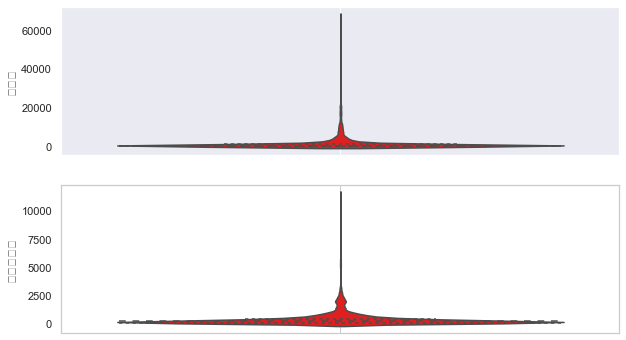

In [194]:
# 查看评论数和价格的分布情况

data2_copy = data[['商品名称','价格（元）','近30天销量（件）','广告词', '促销活动', '评论数','日期','品牌']]

plt.figure(figsize=(10,6))

sns.set_style('whitegrid')

with sns.axes_style('darkgrid'):
    plt.subplot(211)
    sns.set(font='simsun')
    sns.violinplot(y='评论数', data=data2_copy, inner='quartile', color='red')
    plt.ylabel('评论数')
    plt.grid()

plt.subplot(212)
sns.set(font='simsun')
sns.violinplot(y='价格（元）', data=data2_copy, inner='quartile', color='red')
plt.ylabel('价格（元）')
plt.grid()

plt.show()

<AxesSubplot:ylabel='评论数'>

Text(0, 0.5, 'comments')

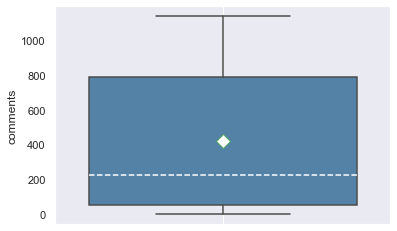

In [180]:
import seaborn as sns

sns.set()

sns.boxplot(y = '评论数', data = data2, 
           showmeans=True,color = 'steelblue',
           flierprops = {'marker':'o','markerfacecolor':'red', 'markersize':10}, 
           meanprops = {'marker':'D','markerfacecolor':'white', 'markersize':10},
           medianprops = {'linestyle':'--','color':'white'}
           )
# plt.xlabel('Bank')
plt.ylabel('comments')
plt.grid()
plt.show()

In [46]:
data2['评论数'][1:10]

index
1    26144.0
2    25921.0
3    22575.0
4    21535.0
5    21178.0
6    21046.0
7    20908.0
8    20568.0
9    20506.0
Name: 评论数, dtype: float64

In [61]:
# 发现评论数有60000+的异常值，用盖帽法处理
# threshold = mean

# 阈值等于99th分位数

comments_new = []
for i in range(len(data2['评论数'])):
    curr = data2['评论数'][i]
    if curr > threshold:
        curr = threshold
    comments_new.append(curr)

data2.loc[:,'评论数'] = pd.Series(comments_new)


<Figure size 720x432 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:ylabel='评论数'>

Text(0, 0.5, '评论数')

<AxesSubplot:>

<AxesSubplot:ylabel='评论数'>

Text(0, 0.5, '评论数')

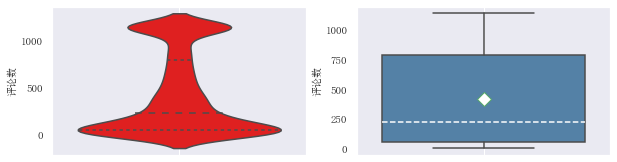

In [204]:
# 处理完异常值以后的数据分布
import seaborn as sns

sns.set(font='simsun')
plt.figure(figsize=(10,6))
plt.subplot(222) # 左右，211，212上下
sns.boxplot(y = '评论数', data = data2, 
           showmeans=True,color = 'steelblue',
           flierprops = {'marker':'o','markerfacecolor':'red', 'markersize':10}, 
           meanprops = {'marker':'D','markerfacecolor':'white', 'markersize':10},
           medianprops = {'linestyle':'--','color':'white'}
           )


# plt.xlabel('Bank')
plt.ylabel(u'评论数', fontproperties=font)
plt.grid()

plt.subplot(221)
sns.violinplot(y='评论数', data=data2, inner='quartile', color='red')
plt.ylabel(u'评论数',fontproperties=font)
plt.grid()

plt.show()

In [99]:
X.isna().mean()

X[X['价格（元）'].isna()]

评论数          0.000000
价格（元）        0.000246
近30天销量（件）    0.000000
dtype: float64

,评论数,价格（元）,近30天销量（件）
172,1140.644796,NaN,1292
1061,1140.644796,NaN,1434


<AxesSubplot:ylabel='价格（元）'>

Text(0, 0.5, '价格（元）')

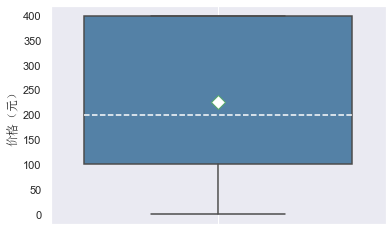

In [102]:
# 查看价格的数据分布
import seaborn as sns

sns.set()

sns.boxplot(y = '价格（元）', data = X, 
           showmeans=True,color = 'steelblue',
           flierprops = {'marker':'o','markerfacecolor':'red', 'markersize':10}, 
           meanprops = {'marker':'D','markerfacecolor':'white', 'markersize':10},
           medianprops = {'linestyle':'--','color':'white'}
           )


# plt.xlabel('Bank')
plt.ylabel(u'价格（元）', fontproperties=font)
plt.grid()
plt.show()

<Figure size 720x432 with 0 Axes>

<AxesSubplot:ylabel='价格（元）'>

Text(0, 0.5, '价格（元）')

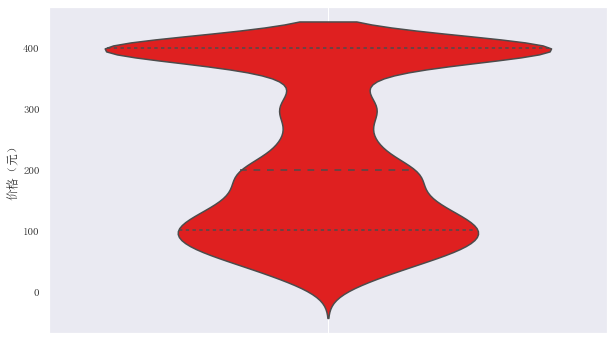

In [190]:
#画箱线和核密度图
plt.figure(figsize=(10,6))

sns.set(font='simsun')
sns.violinplot(y='价格（元）', data=data2, inner='quartile', color='red')
plt.ylabel('价格（元）')
plt.grid()
plt.show()

In [101]:
# 用盖帽法去除价格异常值

# threshold = X['价格（元）'].describe()['mean'] + X['价格（元）'].describe()['std'] * 2 # 95%置信区间
# threshold = X['价格（元）'].describe()['mean'] + X['价格（元）'].describe()['std']
threshold = X['价格（元）'].describe()['mean']


threshold

price_new = []
for i in range(len(data2['价格（元）'])):
    curr = data2['价格（元）'][i]
    if curr > threshold:
        curr = threshold
    price_new.append(curr)

X.loc[:,'价格（元）'] = pd.Series(price_new)

397.6169052890516

D:\Users\Xiaoming\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [108]:
X.loc[:, '价格（元）'] = 价格

X.isna().mean()

D:\Users\Xiaoming\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


评论数          0.0
价格（元）        0.0
近30天销量（件）    0.0
dtype: float64

In [110]:
data2[X.columns] = X
data2

,商品名称,价格（元）,近30天销量（件）,广告词,促销活动,评论数,日期,品牌
0,江小白品鉴酒更多优惠请见详情页非卖品请勿下单！,29.000000,121,单纯高粱酿造 精制包装 特色语录,NaN,1140.644796,2018-02-27,江小白
1,牛栏山 46度二锅头500mL*12整箱（绿瓶）装 清香型,78.000000,8027,正宗牛栏山 地道北京味,NaN,1140.644796,2018-02-27,牛栏山
2,泸州老窖 泸州原浆柔和 52度 500mL 白酒浓香型,20.000000,3116,NaN,NaN,1140.644796,2018-02-27,泸州老窖
3,红星二锅头酒大二绿瓶56度 500ml清香型白酒酒厂直供,13.000000,8703,整箱原厂包装 见详情链接,满99元减10元,1140.644796,2018-02-27,红星
4,52度洋河海之蓝 480mlx2瓶 绵柔型白酒 猫超配送 酒厂直供,326.000000,7165,不参与天猫超市任何优惠券活动,NaN,1140.644796,2018-02-27,洋河
...,...,...,...,...,...,...,...,...
8127,【天猫超市】五粮液 绵柔尖庄 红标50度500ml 正品白酒 浓香白酒,69.000000,8,NaN,NaN,772.355937,2017-05-24,五粮液
8128,【天猫超市】景芝 景芝老窖 46度500ml 浓香型白酒 山东名酒,29.000000,16,NaN,"满2件 ,送任意1件赠品（赠完即止）",313.036307,2017-05-24,景芝
8129,【天猫超市】53度茅台迎宾酒（2013款）500ml*6瓶整箱酒厂直供,397.616905,1,NaN,NaN,123.476749,2017-05-24,茅台
8130,【天猫超市】安达情闷倒驴45度白大闷500ml*12清香型白酒整箱装,108.000000,1,NaN,NaN,232.367495,2017-05-24,安达情


In [134]:
data2 = data2.astype({'评论数':'int'})
data2.dtypes   

商品名称                 object
价格（元）               float64
近30天销量（件）             int64
广告词                  object
促销活动                 object
评论数                   int32
日期           datetime64[ns]
品牌                   object
销售额                 float64
年份                    int64
月份                    int64
dtype: object

In [111]:
data2.isna().mean()

商品名称         0.000000
价格（元）        0.000000
近30天销量（件）    0.000000
广告词          0.419577
促销活动         0.490162
评论数          0.000000
日期           0.000000
品牌           0.000000
dtype: float64

In [136]:
os.chdir('.')
data2.to_excel(r'.\data\酒类销售数据_已处理.xlsx')

## 计算销售额

In [10]:
data2 = pd.read_excel(r'.\data\酒类销售数据_已处理.xlsx')

In [11]:
data2.head()

,Unnamed: 0,商品名称,价格（元）,近30天销量（件）,广告词,促销活动,评论数,日期,品牌,销售额,年份,月份
0,0,江小白品鉴酒更多优惠请见详情页非卖品请勿下单！,29.0,121,单纯高粱酿造 精制包装 特色语录,NaN,1140,2018-02-27,江小白,3509.0,2018,2
1,1,牛栏山 46度二锅头500mL*12整箱（绿瓶）装 清香型,78.0,8027,正宗牛栏山 地道北京味,NaN,1140,2018-02-27,牛栏山,626106.0,2018,2
2,2,泸州老窖 泸州原浆柔和 52度 500mL 白酒浓香型,20.0,3116,NaN,NaN,1140,2018-02-27,泸州老窖,62320.0,2018,2
3,3,红星二锅头酒大二绿瓶56度 500ml清香型白酒酒厂直供,13.0,8703,整箱原厂包装 见详情链接,满99元减10元,1140,2018-02-27,红星,113139.0,2018,2
4,4,52度洋河海之蓝 480mlx2瓶 绵柔型白酒 猫超配送 酒厂直供,326.0,7165,不参与天猫超市任何优惠券活动,NaN,1140,2018-02-27,洋河,2335790.0,2018,2


In [10]:
sales = (data2['价格（元）'] * data2['近30天销量（件）'])
sales.head()

0       3509.0
1     626106.0
2      62320.0
3     113139.0
4    2335790.0
dtype: float64

In [11]:
sales.isna().sum()

np.inf in sales.values

0

False

In [12]:
data2.loc[:, '销售额'] = sales
data2.head()

,Unnamed: 0,商品名称,价格（元）,近30天销量（件）,广告词,促销活动,评论数,日期,品牌,销售额,年份,月份
0,0,江小白品鉴酒更多优惠请见详情页非卖品请勿下单！,29.0,121,单纯高粱酿造 精制包装 特色语录,NaN,1140,2018-02-27,江小白,3509.0,2018,2
1,1,牛栏山 46度二锅头500mL*12整箱（绿瓶）装 清香型,78.0,8027,正宗牛栏山 地道北京味,NaN,1140,2018-02-27,牛栏山,626106.0,2018,2
2,2,泸州老窖 泸州原浆柔和 52度 500mL 白酒浓香型,20.0,3116,NaN,NaN,1140,2018-02-27,泸州老窖,62320.0,2018,2
3,3,红星二锅头酒大二绿瓶56度 500ml清香型白酒酒厂直供,13.0,8703,整箱原厂包装 见详情链接,满99元减10元,1140,2018-02-27,红星,113139.0,2018,2
4,4,52度洋河海之蓝 480mlx2瓶 绵柔型白酒 猫超配送 酒厂直供,326.0,7165,不参与天猫超市任何优惠券活动,NaN,1140,2018-02-27,洋河,2335790.0,2018,2


In [11]:
# 销售额Top5的品牌
data3 = data2.groupby('品牌', axis=0).agg({'销售额': np.sum}).sort_values('销售额', ascending=False).head(5)

data4 = data2.groupby('品牌', axis=0).agg({'近30天销量（件）': np.sum}).sort_values('近30天销量（件）', ascending=False).head(5)



In [12]:
# data3.head()
data3 = data3.reset_index()
data3.columns

Index(['品牌', '销售额'], dtype='object')

In [13]:
data4 = data4.reset_index()
data4.columns

Index(['品牌', '近30天销量（件）'], dtype='object')

Text(0.5, 1.0, 'Top5酒类品牌销售额')

Text(0.5, 0, 'Brand')

Text(0, 0.5, 'Sales')

<BarContainer object of 5 artists>

Text(茅台, 143502278.25, '143502278.2')

Text(洋河, 83199375.85, '83199375.8')

Text(五粮液, 83005473.25000004, '83005473.2')

Text(牛栏山, 37939225.14999999, '37939225.1')

Text(泸州老窖, 32189944.549999997, '32189944.5')

C:\Users\lixia\AppData\Roaming\Python\Python37\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 33541 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\lixia\AppData\Roaming\Python\Python37\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 21488 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\lixia\AppData\Roaming\Python\Python37\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 27915 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\lixia\AppData\Roaming\Python\Python37\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 27827 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\lixia\AppData\Roaming\Python\Python37\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 20116 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\lixia\AppData\Roaming\Python\Python37\sit

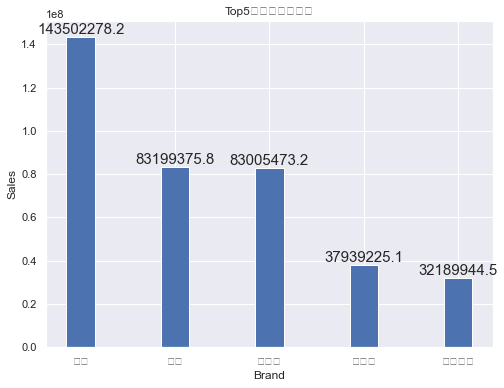

In [14]:
# Top5品牌销售额

import seaborn as sns

sns.set()
fig = plt.figure(figsize=(8,6))

plt.title('Top5酒类品牌销售额')

plt.xlabel('Brand')
plt.ylabel('Sales')

x = data3['品牌']
y = data3['销售额']

plt.bar(x, y, label='品牌',width=0.3)

# plt.bar(x,y)

for a,b in zip(x,y):
    plt.text(a, b+0.05, '%.1f' % b, ha='center', va= 'bottom',fontsize=15)
    #%.1f是将该浮点数float保留两位小数

plt.show()

Text(0.5, 1.0, 'Top5酒类品牌销量')

Text(0.5, 0, 'Brand')

Text(0, 0.5, 'Volume')

<BarContainer object of 5 artists>

Text(五粮液, 489881.05, '489881.0')

Text(牛栏山, 386274.05, '386274.0')

Text(洋河, 283055.05, '283055.0')

Text(红星, 254679.05, '254679.0')

Text(茅台, 227210.05, '227210.0')

C:\Users\lixia\AppData\Roaming\Python\Python37\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 20116 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\lixia\AppData\Roaming\Python\Python37\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 31918 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\lixia\AppData\Roaming\Python\Python37\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 28082 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\lixia\AppData\Roaming\Python\Python37\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 29275 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\lixia\AppData\Roaming\Python\Python37\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 26639 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\lixia\AppData\Roaming\Python\Python37\sit

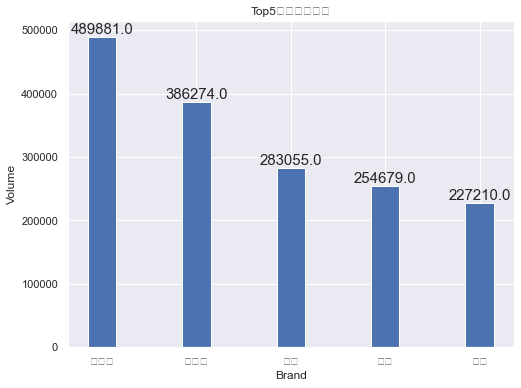

In [58]:
# Top5品牌销量

sns.set()
fig = plt.figure(figsize=(8,6))


plt.title('Top5酒类品牌销量')

plt.xlabel('Brand')
plt.ylabel('Volume')

x = data4['品牌']
y = data4['近30天销量（件）']

plt.bar(x, y, label='品牌',width=0.3)

# plt.bar(x,y)

for a,b in zip(x,y):
    plt.text(a, b+0.05, '%.1f' % b, ha='center', va= 'bottom',fontsize=15)
    #%.1f是将该浮点数float保留两位小数

plt.show()

## 添加年月份数据

In [13]:
# 添加年份列

def get_year(dates):
    dates_new = pd.to_datetime(dates)
    years = dates_new.dt.year
    return years

get_year(data2['日期']).unique()

# 添加月份列

def get_month(dates):
    dates_new = pd.to_datetime(dates)
    months = dates_new.dt.month
    return months

get_month(data2['日期'])

array([2018, 2017], dtype=int64)

0       2
1       2
2       2
3       2
4       2
       ..
8127    5
8128    5
8129    5
8130    5
8131    5
Name: 日期, Length: 8132, dtype: int64

In [116]:
data2.loc[:, '年份'] = get_year(data2['日期'])
data2.loc[:, '月份'] = get_month(data2['日期'])

data2.head()

,商品名称,价格（元）,近30天销量（件）,广告词,促销活动,评论数,日期,品牌,销售额,年份,月份
0,江小白品鉴酒更多优惠请见详情页非卖品请勿下单！,29.0,121,单纯高粱酿造 精制包装 特色语录,NaN,1140.644796,2018-02-27,江小白,3509.0,2018,2
1,牛栏山 46度二锅头500mL*12整箱（绿瓶）装 清香型,78.0,8027,正宗牛栏山 地道北京味,NaN,1140.644796,2018-02-27,牛栏山,626106.0,2018,2
2,泸州老窖 泸州原浆柔和 52度 500mL 白酒浓香型,20.0,3116,NaN,NaN,1140.644796,2018-02-27,泸州老窖,62320.0,2018,2
3,红星二锅头酒大二绿瓶56度 500ml清香型白酒酒厂直供,13.0,8703,整箱原厂包装 见详情链接,满99元减10元,1140.644796,2018-02-27,红星,113139.0,2018,2
4,52度洋河海之蓝 480mlx2瓶 绵柔型白酒 猫超配送 酒厂直供,326.0,7165,不参与天猫超市任何优惠券活动,NaN,1140.644796,2018-02-27,洋河,2335790.0,2018,2


In [82]:
data2['月份'].unique()

array([ 2,  1, 12, 11,  9,  8,  7,  5], dtype=int64)

## 年度销售数据汇总

In [9]:
data2 = pd.read_excel(r'.\data\酒类销售数据_已处理.xlsx')
data2.head()

,Unnamed: 0,商品名称,价格（元）,近30天销量（件）,广告词,促销活动,评论数,日期,品牌,销售额,年份,月份
0,0,江小白品鉴酒更多优惠请见详情页非卖品请勿下单！,29.0,121,单纯高粱酿造 精制包装 特色语录,NaN,1140,2018-02-27,江小白,3509.0,2018,2
1,1,牛栏山 46度二锅头500mL*12整箱（绿瓶）装 清香型,78.0,8027,正宗牛栏山 地道北京味,NaN,1140,2018-02-27,牛栏山,626106.0,2018,2
2,2,泸州老窖 泸州原浆柔和 52度 500mL 白酒浓香型,20.0,3116,NaN,NaN,1140,2018-02-27,泸州老窖,62320.0,2018,2
3,3,红星二锅头酒大二绿瓶56度 500ml清香型白酒酒厂直供,13.0,8703,整箱原厂包装 见详情链接,满99元减10元,1140,2018-02-27,红星,113139.0,2018,2
4,4,52度洋河海之蓝 480mlx2瓶 绵柔型白酒 猫超配送 酒厂直供,326.0,7165,不参与天猫超市任何优惠券活动,NaN,1140,2018-02-27,洋河,2335790.0,2018,2


In [10]:
data2 = data2.drop(columns = [data2.columns.values[0]], axis = 1)

In [14]:
sales_by_year = pd.pivot_table(data2, values=['销售额', '近30天销量（件）','评论数'],index=['品牌'],columns=['年份'],aggfunc='sum')

sales_by_year.head()
# sales_by_year.isna().sum()

sales_by_year.loc[:,'总销售额'] = sales_by_year[('销售额',2017)] + sales_by_year[('销售额',2018)]

sales_by_year.loc[:,'总销量'] = sales_by_year[('近30天销量（件）',2017)] + sales_by_year[('近30天销量（件）',2018)]

sales_by_year.loc[:,'销售额同比'] = (sales_by_year[('销售额',2018)] - sales_by_year[('销售额',2017)]) / sales_by_year[('销售额',2017)]

sales_by_year.loc[:,'销量同比'] = (sales_by_year[('近30天销量（件）',2018)] - sales_by_year[('近30天销量（件）',2017)]) / sales_by_year[('近30天销量（件）',2017)]

sales_by_year.rename({'近30天销量（件）':'年销量','销售额':'年销售额'},axis=1,inplace=True)

# sales_by_year.loc[:,'总销售额'] = sales_by_year['销售额'].sum()

sales_by_year = sales_by_year.sort_values('总销售额', ascending=False)

sales_by_year.head()

评论数           近30天销量（件）                     销售额              
年份         2017      2018      2017      2018          2017          2018
品牌                                                                       
Union    5134.0    5870.0   10649.0    9409.0  6.911750e+04  8.208800e+04
习酒      27745.0   11889.0   22663.0   17422.0  6.558458e+06  5.735002e+06
五粮液    435353.0  136056.0  255986.0  233895.0  3.281004e+07  3.194698e+07
伊力特       356.0     544.0    1209.0    1035.0  1.847123e+05  1.901982e+05
八八坑       392.0     337.0     527.0     616.0  1.196878e+05  1.365983e+05

评论数                 年销量                    年销售额                \
年份        2017      2018      2017      2018          2017          2018   
品牌                                                                         
五粮液   435353.0  136056.0  255986.0  233895.0  3.281004e+07  3.194698e+07   
洋河    298495.0   91731.0  158529.0  124526.0  2.895496e+07  3.235994e+07   
茅台    230477.0   75702.0  107282.0  119928.0  1.965473e+07  2.815223e+07   
牛栏山   214954.0   77122.0  248719.0  137555.0  2.161049e+07  1.456382e+07   
泸州老窖  199757.0   51871.0  101929.0   63864.0  1.248596e+07  1.082010e+07   

              总销售额       总销量     销售额同比      销量同比  
年份                                                
品牌                                                
五粮液   6.475702e+07  489881.0 -0.026305 -0.086298  
洋河    6.131490e+07  283055.0  0.117596 -0.214491  
茅台    4.780696e+07  227210.0  0.432339  0.117876  
牛栏山   3.617431e+07  386274.0 -0.326077 -0.446946  
泸州老窖  2.330605e+07  165793.0 -0.133419 -0.373446

In [139]:
sales_by_year.to_excel(r'.\data\酒类年度销售数据汇总.xlsx')

## 月度销售数据汇总

In [35]:
sales_by_month = pd.pivot_table(data2, values=['销售额', '近30天销量（件）'],index=['品牌'],columns=['年份','月份'],aggfunc='sum')
sales_by_month # 缺失值是否用零填充就可以？

近30天销量（件）                                                          \
年份         2017                                                    2018   
月份           5        7        8        9        11        12        1    
品牌                                                                        
Union       NaN      NaN      NaN      NaN      NaN   10649.0    9409.0   
习酒       1146.0   2320.0    861.0   4334.0   2637.0   11365.0    8193.0   
五粮液     19860.0  16767.0  27701.0  59453.0  33421.0   98784.0  129861.0   
伊力特         NaN      NaN     25.0      NaN    271.0     913.0     363.0   
八八坑         NaN      6.0     60.0    117.0     95.0     249.0     282.0   
剑南春      2620.0   6162.0   4176.0   8802.0   4261.0   17403.0   16349.0   
劲牌          NaN      NaN      8.0      NaN    232.0     974.0    1065.0   
劲酒       4872.0   6220.0   8432.0  14108.0   9788.0   25934.0   19281.0   
双沟          NaN    671.0    125.0      NaN     35.0    4772.0     250.0   
双沟君坊        NaN      NaN      NaN    271.0    118.0     314.0     825.0   
双沟醴泉      147.0    231.0    140.0      NaN     70.0     354.0     244.0   
古井贡酒     1708.0   2112.0   3227.0  14663.0   8676.0   21024.0   24265.0   
古越龙山      229.0    181.0    492.0    537.0    409.0     537.0     415.0   
喜碧曼         NaN      NaN      NaN      NaN      NaN       4.0       4.0   
四特        797.0   1264.0   1036.0   1629.0   1758.0    3129.0    1717.0   
国台         18.0     74.0    326.0     32.0     61.0     299.0      61.0   
天佑德       122.0    132.0    277.0    397.0    514.0    2693.0    2486.0   
安达情       122.0    179.0    136.0    336.0    322.0     812.0     585.0   
小糊涂仙      816.0   1362.0   1143.0   1735.0   1393.0    4871.0    3283.0   
年份原浆        3.0     31.0     16.0      NaN    164.0     977.0     929.0   
景芝        112.0     43.0     81.0     51.0     85.0       9.0       8.0   
杜康          NaN      NaN      NaN     40.0     49.0     140.0     186.0   
樱花汇         NaN      NaN      NaN      NaN      NaN       NaN     285.0   
欧欣          NaN      NaN      NaN      NaN      NaN     380.0     517.0   
水井坊       234.0    909.0    426.0   1246.0    723.0    1384.0    1354.0   
江小白     15714.0   6855.0   7631.0  10820.0  10922.0   40060.0   28599.0   
汾酒       3458.0   3603.0   7059.0   8174.0   8050.0   21415.0   17532.0   
泸州老窖     8884.0  12188.0   9883.0  18412.0  14867.0   37695.0   38441.0   
洋河      15037.0  24197.0  12843.0  25895.0  20149.0   60408.0   55292.0   
牛栏山     16873.0  23801.0  20921.0  41326.0  39557.0  106241.0   72014.0   
珍酒          NaN      NaN      NaN     56.0    120.0     220.0     373.0   
白云边      2053.0   1766.0   1379.0   2916.0   1735.0    5813.0    6398.0   
白水杜康       66.0     74.0    158.0     97.0     80.0     241.0     288.0   
稻花香        86.0    328.0    474.0    773.0    582.0    1113.0    1162.0   
红星      15547.0  26442.0  20682.0  31395.0  28779.0   66556.0   36741.0   
致中和      1834.0   1770.0   3395.0   3342.0   1548.0    4565.0    1522.0   
舒可曼         NaN      NaN      NaN      NaN      NaN     666.0     582.0   
茅台       6202.0   8932.0   8344.0  18938.0  17248.0   47618.0   50515.0   
董酒        463.0    727.0     60.0    328.0    220.0    1245.0    1137.0   
衡水老白干    1583.0   1500.0   2278.0   3941.0   3378.0    6877.0    3861.0   
西凤       1529.0   1422.0   2515.0   4238.0   1866.0    4056.0    5408.0   
贵州国台        NaN      2.0      0.0      2.0      2.0       7.0      14.0   
赖茅          NaN      NaN      NaN      NaN      NaN      30.0     411.0   
迎驾贡酒        0.0      0.0     35.0      NaN      NaN       NaN    2144.0   
郎酒       2204.0   2347.0   2713.0   5366.0   3920.0   12332.0    9831.0   
酒鬼酒       143.0     34.0     56.0     52.0      1.0     105.0       3.0   
金六福        74.0    212.0    203.0    518.0    138.0     440.0     191.0   
金门        820.0   1093.0    733.0   1264.0   1065.0    3303.0    2677.0   
飞天不老     1216.0    884.0   3208.0   4963.0   2505.0    7848.0    9121.0   
黄金酒         NaN      NaN      N

In [138]:
sales_by_month[:,'总销售额'] = pd.Series([])
np.sum(sales_by_month.iloc[0,:])
np.sum(sales_by_month.iloc[1,:])

171263.5

13324257.6

## Top5品牌销量和销售额情况

In [30]:
sales_by_year = pd.read_excel(r'.\data\酒类年度销售数据汇总.xlsx', skiprows=3, header=None)
sales_by_year.head()

D:\Users\Xiaoming\Anaconda3\lib\site-packages\xlrd\xlsx.py:266: PendingDeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():


,0,1,2,3,4,5,6,7,8,9,10
0,五粮液,435353.0,136056,255986.0,233895,3.281004e+07,3.194698e+07,6.475702e+07,489881.0,-0.026305,-0.086298
1,洋河,298495.0,91731,158529.0,124526,2.895496e+07,3.235994e+07,6.131490e+07,283055.0,0.117596,-0.214491
2,茅台,230477.0,75702,107282.0,119928,1.965473e+07,2.815223e+07,4.780696e+07,227210.0,0.432339,0.117876
3,牛栏山,214954.0,77122,248719.0,137555,2.161049e+07,1.456382e+07,3.617431e+07,386274.0,-0.326077,-0.446946
4,泸州老窖,199757.0,51871,101929.0,63864,1.248596e+07,1.082010e+07,2.330605e+07,165793.0,-0.133419,-0.373446


In [31]:
sales_by_year.columns = ['品牌','评论数2017','评论数2018','年销量2017','年销量2018','年销售额2017','年销售额2018','总销售额','总销量','销售额同比','销量同比']
sales_by_year.set_index('品牌')
sales_by_year.head()

,评论数2017,评论数2018,年销量2017,年销量2018,年销售额2017,年销售额2018,总销售额,总销量,销售额同比,销量同比
品牌,,,,,,,,,,
五粮液,435353.0,136056,255986.0,233895,3.281004e+07,3.194698e+07,6.475702e+07,489881.0,-0.026305,-0.086298
洋河,298495.0,91731,158529.0,124526,2.895496e+07,3.235994e+07,6.131490e+07,283055.0,0.117596,-0.214491
茅台,230477.0,75702,107282.0,119928,1.965473e+07,2.815223e+07,4.780696e+07,227210.0,0.432339,0.117876
牛栏山,214954.0,77122,248719.0,137555,2.161049e+07,1.456382e+07,3.617431e+07,386274.0,-0.326077,-0.446946
泸州老窖,199757.0,51871,101929.0,63864,1.248596e+07,1.082010e+07,2.330605e+07,165793.0,-0.133419,-0.373446
红星,122441.0,37912,189401.0,65278,1.155939e+07,5.607295e+06,1.716669e+07,254679.0,-0.514915,-0.655345
江小白,83620.0,27080,92002.0,58484,9.255388e+06,7.571474e+06,1.682686e+07,150486.0,-0.181939,-0.364318
劲酒,100528.0,29810,69354.0,34715,1.057049e+07,5.954554e+06,1.652505e+07,104069.0,-0.436681,-0.499452
古井贡酒,104248.0,37264,51410.0,42544,6.966582e+06,8.720891e+06,1.568747e+07,93954.0,0.251818,-0.172457


,品牌,评论数2017,评论数2018,年销量2017,年销量2018,年销售额2017,年销售额2018,总销售额,总销量,销售额同比,销量同比
0,五粮液,435353.0,136056,255986.0,233895,3.281004e+07,3.194698e+07,6.475702e+07,489881.0,-0.026305,-0.086298
1,洋河,298495.0,91731,158529.0,124526,2.895496e+07,3.235994e+07,6.131490e+07,283055.0,0.117596,-0.214491
2,茅台,230477.0,75702,107282.0,119928,1.965473e+07,2.815223e+07,4.780696e+07,227210.0,0.432339,0.117876
3,牛栏山,214954.0,77122,248719.0,137555,2.161049e+07,1.456382e+07,3.617431e+07,386274.0,-0.326077,-0.446946
4,泸州老窖,199757.0,51871,101929.0,63864,1.248596e+07,1.082010e+07,2.330605e+07,165793.0,-0.133419,-0.373446


In [32]:
# 总销售额Top5的品牌
sales_by_year_top5 = sales_by_year.sort_values('总销售额', ascending=False).iloc[range(5),:]

sales_by_year_top5

,品牌,评论数2017,评论数2018,年销量2017,年销量2018,年销售额2017,年销售额2018,总销售额,总销量,销售额同比,销量同比
0,五粮液,435353.0,136056,255986.0,233895,3.281004e+07,3.194698e+07,6.475702e+07,489881.0,-0.026305,-0.086298
1,洋河,298495.0,91731,158529.0,124526,2.895496e+07,3.235994e+07,6.131490e+07,283055.0,0.117596,-0.214491
2,茅台,230477.0,75702,107282.0,119928,1.965473e+07,2.815223e+07,4.780696e+07,227210.0,0.432339,0.117876
3,牛栏山,214954.0,77122,248719.0,137555,2.161049e+07,1.456382e+07,3.617431e+07,386274.0,-0.326077,-0.446946
4,泸州老窖,199757.0,51871,101929.0,63864,1.248596e+07,1.082010e+07,2.330605e+07,165793.0,-0.133419,-0.373446


In [80]:
sales_by_year_top5_2017 = sales_by_year.sort_values('年销售额2017', ascending=False).iloc[range(5),:]
sales_by_year_top5_2017

,品牌,评论数2017,评论数2018,年销量2017,年销量2018,年销售额2017,年销售额2018,总销售额,总销量,销售额同比,销量同比
0,五粮液,435353.0,136056,255986.0,233895,3.281004e+07,3.194698e+07,6.475702e+07,489881.0,-0.026305,-0.086298
1,洋河,298495.0,91731,158529.0,124526,2.895496e+07,3.235994e+07,6.131490e+07,283055.0,0.117596,-0.214491
3,牛栏山,214954.0,77122,248719.0,137555,2.161049e+07,1.456382e+07,3.617431e+07,386274.0,-0.326077,-0.446946
2,茅台,230477.0,75702,107282.0,119928,1.965473e+07,2.815223e+07,4.780696e+07,227210.0,0.432339,0.117876
4,泸州老窖,199757.0,51871,101929.0,63864,1.248596e+07,1.082010e+07,2.330605e+07,165793.0,-0.133419,-0.373446


In [81]:
sales_by_year_top5_2018 = sales_by_year.sort_values('年销售额2018', ascending=False).iloc[range(5),:]
sales_by_year_top5_2018

,品牌,评论数2017,评论数2018,年销量2017,年销量2018,年销售额2017,年销售额2018,总销售额,总销量,销售额同比,销量同比
1,洋河,298495.0,91731,158529.0,124526,2.895496e+07,3.235994e+07,6.131490e+07,283055.0,0.117596,-0.214491
0,五粮液,435353.0,136056,255986.0,233895,3.281004e+07,3.194698e+07,6.475702e+07,489881.0,-0.026305,-0.086298
2,茅台,230477.0,75702,107282.0,119928,1.965473e+07,2.815223e+07,4.780696e+07,227210.0,0.432339,0.117876
3,牛栏山,214954.0,77122,248719.0,137555,2.161049e+07,1.456382e+07,3.617431e+07,386274.0,-0.326077,-0.446946
4,泸州老窖,199757.0,51871,101929.0,63864,1.248596e+07,1.082010e+07,2.330605e+07,165793.0,-0.133419,-0.373446


In [83]:
vol_by_year_top5_2017 = sales_by_year.sort_values('年销量2017', ascending=False).iloc[range(5),:]
vol_by_year_top5_2017

,品牌,评论数2017,评论数2018,年销量2017,年销量2018,年销售额2017,年销售额2018,总销售额,总销量,销售额同比,销量同比
0,五粮液,435353.0,136056,255986.0,233895,3.281004e+07,3.194698e+07,6.475702e+07,489881.0,-0.026305,-0.086298
3,牛栏山,214954.0,77122,248719.0,137555,2.161049e+07,1.456382e+07,3.617431e+07,386274.0,-0.326077,-0.446946
5,红星,122441.0,37912,189401.0,65278,1.155939e+07,5.607295e+06,1.716669e+07,254679.0,-0.514915,-0.655345
1,洋河,298495.0,91731,158529.0,124526,2.895496e+07,3.235994e+07,6.131490e+07,283055.0,0.117596,-0.214491
2,茅台,230477.0,75702,107282.0,119928,1.965473e+07,2.815223e+07,4.780696e+07,227210.0,0.432339,0.117876


In [84]:
vol_by_year_top5_2018 = sales_by_year.sort_values('年销量2018', ascending=False).iloc[range(5),:]
vol_by_year_top5_2018

,品牌,评论数2017,评论数2018,年销量2017,年销量2018,年销售额2017,年销售额2018,总销售额,总销量,销售额同比,销量同比
0,五粮液,435353.0,136056,255986.0,233895,3.281004e+07,3.194698e+07,6.475702e+07,489881.0,-0.026305,-0.086298
3,牛栏山,214954.0,77122,248719.0,137555,2.161049e+07,1.456382e+07,3.617431e+07,386274.0,-0.326077,-0.446946
1,洋河,298495.0,91731,158529.0,124526,2.895496e+07,3.235994e+07,6.131490e+07,283055.0,0.117596,-0.214491
2,茅台,230477.0,75702,107282.0,119928,1.965473e+07,2.815223e+07,4.780696e+07,227210.0,0.432339,0.117876
5,红星,122441.0,37912,189401.0,65278,1.155939e+07,5.607295e+06,1.716669e+07,254679.0,-0.514915,-0.655345


In [33]:
# 总销量Top5的品牌

vol_by_year_top5 = sales_by_year.sort_values('总销量', ascending=False).iloc[range(5),:]
vol_by_year_top5

,品牌,评论数2017,评论数2018,年销量2017,年销量2018,年销售额2017,年销售额2018,总销售额,总销量,销售额同比,销量同比
0,五粮液,435353.0,136056,255986.0,233895,3.281004e+07,3.194698e+07,6.475702e+07,489881.0,-0.026305,-0.086298
3,牛栏山,214954.0,77122,248719.0,137555,2.161049e+07,1.456382e+07,3.617431e+07,386274.0,-0.326077,-0.446946
1,洋河,298495.0,91731,158529.0,124526,2.895496e+07,3.235994e+07,6.131490e+07,283055.0,0.117596,-0.214491
5,红星,122441.0,37912,189401.0,65278,1.155939e+07,5.607295e+06,1.716669e+07,254679.0,-0.514915,-0.655345
2,茅台,230477.0,75702,107282.0,119928,1.965473e+07,2.815223e+07,4.780696e+07,227210.0,0.432339,0.117876


<Figure size 1728x1152 with 0 Axes>

<AxesSubplot:>

Text(0, 12, '64757017.7')

Text(0, 12, 'nan')

Text(0, 12, 'nan')

Text(0, 12, 'nan')

Text(0, 12, 'nan')

Text(0, 12, 'nan')

Text(0, 12, '61314896.4')

Text(0, 12, 'nan')

Text(0, 12, 'nan')

Text(0, 12, 'nan')

Text(0, 12, 'nan')

Text(0, 12, 'nan')

Text(0, 12, '47806959.5')

Text(0, 12, 'nan')

Text(0, 12, 'nan')

Text(0, 12, 'nan')

Text(0, 12, 'nan')

Text(0, 12, 'nan')

Text(0, 12, '36174307.1')

Text(0, 12, 'nan')

Text(0, 12, 'nan')

Text(0, 12, 'nan')

Text(0, 12, 'nan')

Text(0, 12, 'nan')

Text(0, 12, '23306053.8')

Text(0.5, 1.0, '总销售额Top5的品牌')

Text(0.5, 0, '品牌')

Text(0, 0.5, '总销售额')

<AxesSubplot:>

Text(0, 12, '489881.0')

Text(0, 12, 'nan')

Text(0, 12, 'nan')

Text(0, 12, 'nan')

Text(0, 12, 'nan')

Text(0, 12, 'nan')

Text(0, 12, '386274.0')

Text(0, 12, 'nan')

Text(0, 12, 'nan')

Text(0, 12, 'nan')

Text(0, 12, 'nan')

Text(0, 12, 'nan')

Text(0, 12, '283055.0')

Text(0, 12, 'nan')

Text(0, 12, 'nan')

Text(0, 12, 'nan')

Text(0, 12, 'nan')

Text(0, 12, 'nan')

Text(0, 12, '254679.0')

Text(0, 12, 'nan')

Text(0, 12, 'nan')

Text(0, 12, 'nan')

Text(0, 12, 'nan')

Text(0, 12, 'nan')

Text(0, 12, '227210.0')

Text(0.5, 1.0, '总销售额Top5的品牌')

Text(0.5, 0, '品牌')

Text(0, 0.5, '总销量')

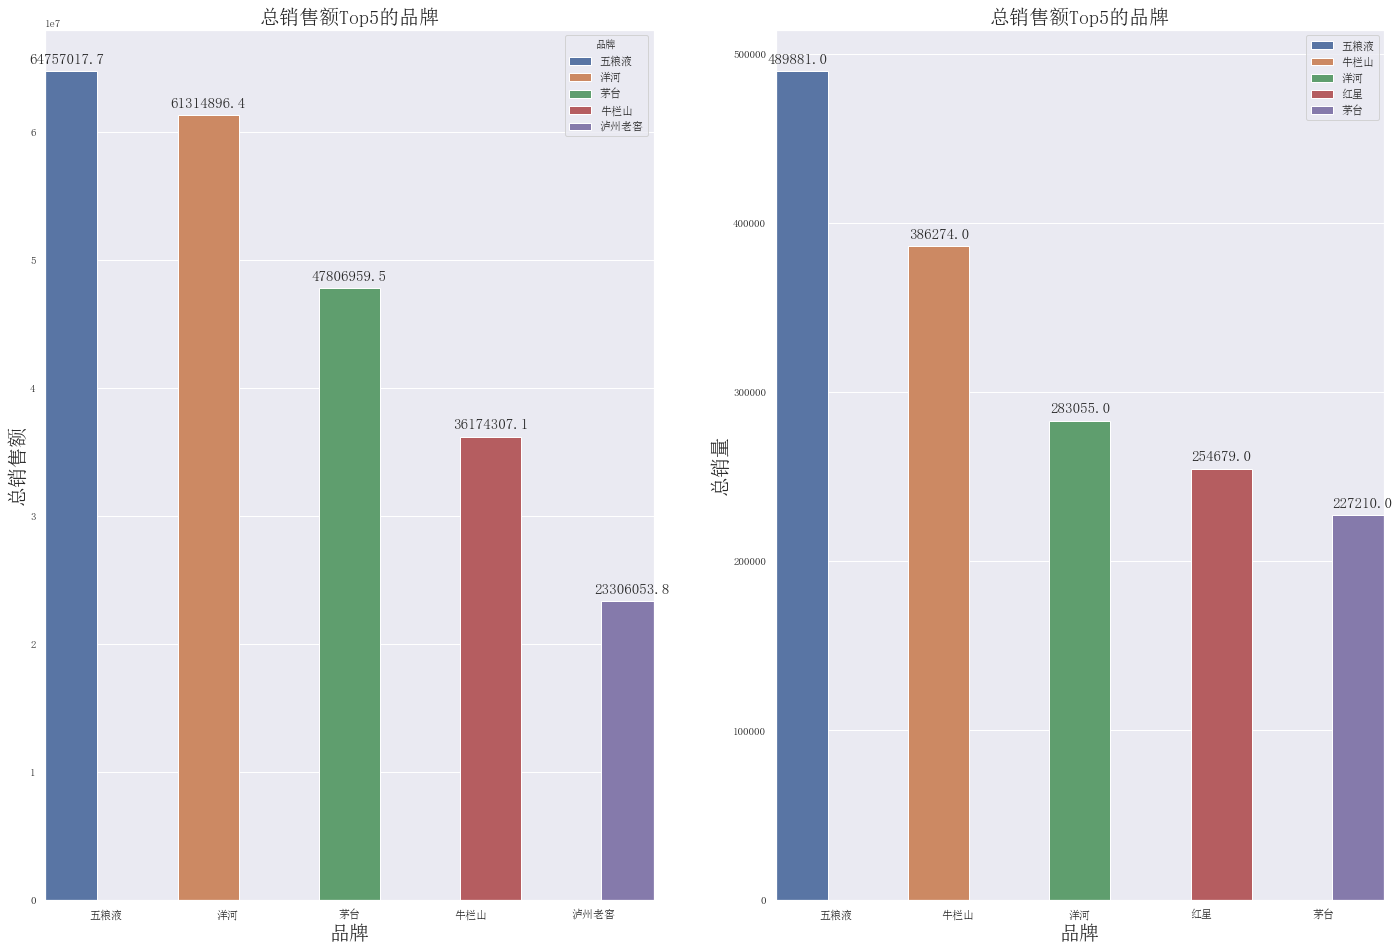

Text(0, 12, '132.2')

Text(0, 12, 'nan')

Text(0, 12, 'nan')

Text(0, 12, 'nan')

Text(0, 12, 'nan')

Text(0, 12, 'nan')

Text(0, 12, '216.6')

Text(0, 12, 'nan')

Text(0, 12, 'nan')

Text(0, 12, 'nan')

Text(0, 12, 'nan')

Text(0, 12, 'nan')

Text(0, 12, '210.4')

Text(0, 12, 'nan')

Text(0, 12, 'nan')

Text(0, 12, 'nan')

Text(0, 12, 'nan')

Text(0, 12, 'nan')

Text(0, 12, '93.6')

Text(0, 12, 'nan')

Text(0, 12, 'nan')

Text(0, 12, 'nan')

Text(0, 12, 'nan')

Text(0, 12, 'nan')

Text(0, 12, '140.6')

Text(0.5, 0, '品牌')

Text(0, 0.5, '产品均价')

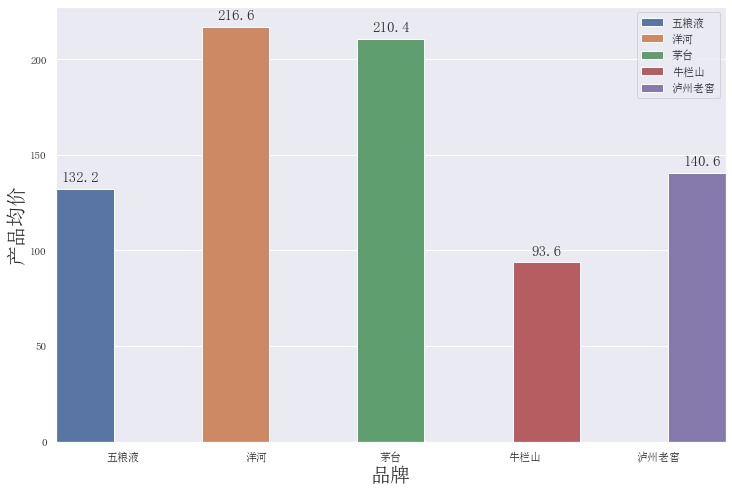

In [52]:
# 总销售额&总销量Top5的品牌
import seaborn as sns
font = 'simsun'

plt.figure(figsize=(12*2,8*2))

sns.set(font='simsun')

x='品牌'
y='总销售额'

kwarg = {'barwidth':1}

# fig,(ax1,ax2,ax3) = plt.subplots(1,3)

# sns.barplot(x,y,data=sales_by_year_top5, hue=None, **kwarg)
plt.subplot(121)

splot = sns.barplot(x,y,data=sales_by_year_top5, hue='品牌')
for p in splot.patches:
            splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, 12), 
                   textcoords = 'offset points')
new_value = .5
for patch in splot.patches :
    current_width = patch.get_width()
    diff = current_width - new_value

    # we change the bar width
    patch.set_width(new_value)

    # we recenter the bar
    patch.set_x(patch.get_x() + diff * .5)
plt.title('总销售额Top5的品牌',fontproperties=font,fontsize=20)
plt.xlabel(x,fontproperties=font,fontsize=20,loc='center')
plt.ylabel(y,fontproperties=font,fontsize=20,loc='center')
# 在柱形顶端显示数值

plt.subplot(122)
y = '总销量'
splot = sns.barplot(x,y,data=vol_by_year_top5, hue='品牌')
for p in splot.patches:
            splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, 12), 
                   textcoords = 'offset points')
new_value = .5
for patch in splot.patches :
    current_width = patch.get_width()
    diff = current_width - new_value

    # we change the bar width
    patch.set_width(new_value)

    # we recenter the bar
    patch.set_x(patch.get_x() + diff * .5)
plt.title('总销售额Top5的品牌',fontproperties=font,fontsize=20)
plt.xlabel(x,fontproperties=font,fontsize=20,loc='center')
plt.ylabel(y,fontproperties=font,fontsize=20,loc='center')
# plt.xticks(position,xtick,rotation=0, fontsize=15)

plt.legend(loc='best')

plt.savefig(r'.\charts\总销售额Top5的品牌&总销量Top5的品牌.jpg')
plt.show()

Text(0, 12, '132.2')

Text(0, 12, 'nan')

Text(0, 12, 'nan')

Text(0, 12, 'nan')

Text(0, 12, 'nan')

Text(0, 12, 'nan')

Text(0, 12, '216.6')

Text(0, 12, 'nan')

Text(0, 12, 'nan')

Text(0, 12, 'nan')

Text(0, 12, 'nan')

Text(0, 12, 'nan')

Text(0, 12, '210.4')

Text(0, 12, 'nan')

Text(0, 12, 'nan')

Text(0, 12, 'nan')

Text(0, 12, 'nan')

Text(0, 12, 'nan')

Text(0, 12, '93.6')

Text(0, 12, 'nan')

Text(0, 12, 'nan')

Text(0, 12, 'nan')

Text(0, 12, 'nan')

Text(0, 12, 'nan')

Text(0, 12, '140.6')

Text(0.5, 0, '品牌')

Text(0, 0.5, '产品均价')

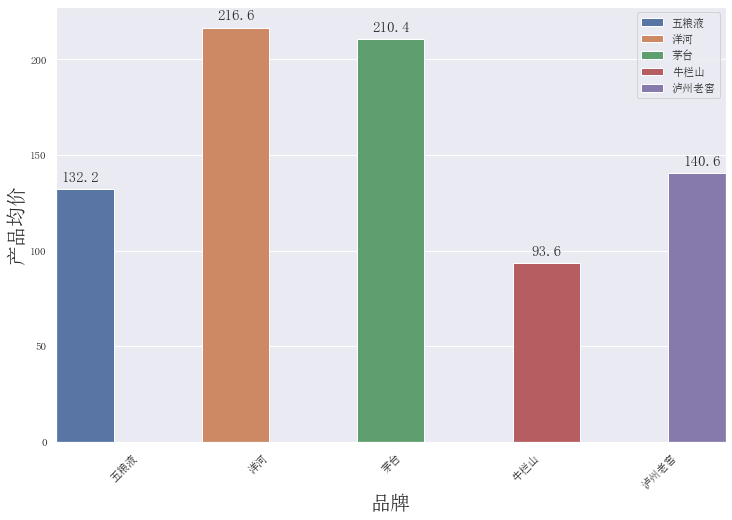

In [55]:
# Top5品牌产品均价
import seaborn as sns

figure = plt.figure(figsize=(12,8))

sns.set(font='simsun')

x = '品牌'

y = sales_by_year_top5['总销售额'] / sales_by_year_top5['总销量']
splot = sns.barplot(x,y,data=sales_by_year_top5, hue='品牌') 
for p in splot.patches:
            splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, 12), 
    
                   textcoords = 'offset points')

new_value = .5
pos = []
for patch in splot.patches:
    current_width = patch.get_width()
    diff = current_width - new_value

    # we change the bar width
    patch.set_width(new_value)

    # we recenter the bar
    patch.set_x(patch.get_x() + diff * .5)
    pos.append(patch.get_x())

# set the xticks location and rotation
for item in splot.get_xticklabels():
    item.set_rotation(45)
    item.set_x(item._x + new_value)
    # dir(item)

# plt.xticks(pos + [new_value / 2,]*len(pos), sales_by_year_top5['品牌'], rotation=45)
plt.xlabel(x,fontproperties=font,fontsize=20,loc='center')
plt.ylabel('产品均价',fontproperties=font,fontsize=20,loc='center')

plt.legend(loc='best')

plt.savefig(r'.\charts\总销售额Top5的品牌 - 产品均价2.jpg')

plt.show()

In [49]:
type(splot)

matplotlib.axes._subplots.AxesSubplot

In [43]:
sales_by_year_top5.head()

,品牌,评论数2017,评论数2018,年销量2017,年销量2018,年销售额2017,年销售额2018,总销售额,总销量,销售额同比,销量同比
0,五粮液,435353.0,136056,255986.0,233895,3.281004e+07,3.194698e+07,6.475702e+07,489881.0,-0.026305,-0.086298
1,洋河,298495.0,91731,158529.0,124526,2.895496e+07,3.235994e+07,6.131490e+07,283055.0,0.117596,-0.214491
2,茅台,230477.0,75702,107282.0,119928,1.965473e+07,2.815223e+07,4.780696e+07,227210.0,0.432339,0.117876
3,牛栏山,214954.0,77122,248719.0,137555,2.161049e+07,1.456382e+07,3.617431e+07,386274.0,-0.326077,-0.446946
4,泸州老窖,199757.0,51871,101929.0,63864,1.248596e+07,1.082010e+07,2.330605e+07,165793.0,-0.133419,-0.373446


In [93]:
len(sales_by_year_top5)

5

In [47]:
sales_by_year_top5_copy.dtypes

年份    object
0     object
1     object
2     object
3     object
4     object
dtype: object

In [ ]:
# 准备seaborn画图时要用的数据结构
sales_by_year_top5_copy =  sales_by_year_top5.reset_index().T.reset_index()
sales_by_year_top5_copy = sales_by_year_top5_copy.set_index(sales_by_year_top5_copy.columns.values[0])

sales_by_year_top5_copy = sales_by_year_top5_copy.astype({'年份':'str'})

x = sales_by_year_top5_copy.loc['品牌',:].values

In [61]:
sales_by_year_top5.head()

,品牌,评论数2017,评论数2018,年销量2017,年销量2018,年销售额2017,年销售额2018,总销售额,总销量,销售额同比,销量同比
0,五粮液,435353.0,136056,255986.0,233895,3.281004e+07,3.194698e+07,6.475702e+07,489881.0,-0.026305,-0.086298
1,洋河,298495.0,91731,158529.0,124526,2.895496e+07,3.235994e+07,6.131490e+07,283055.0,0.117596,-0.214491
2,茅台,230477.0,75702,107282.0,119928,1.965473e+07,2.815223e+07,4.780696e+07,227210.0,0.432339,0.117876
3,牛栏山,214954.0,77122,248719.0,137555,2.161049e+07,1.456382e+07,3.617431e+07,386274.0,-0.326077,-0.446946
4,泸州老窖,199757.0,51871,101929.0,63864,1.248596e+07,1.082010e+07,2.330605e+07,165793.0,-0.133419,-0.373446


<Figure size 864x576 with 0 Axes>

[0 1 2 3 4]


<BarContainer object of 5 artists>

<BarContainer object of 5 artists>

Text(-0.15, 32810041.51985482, '32810041.5')

Text(0.85, 28954959.23024108, '28954959.2')

Text(1.85, 19654730.07418694, '19654730.0')

Text(2.85, 21610490.65645511, '21610490.6')

Text(3.85, 12485956.30965558, '12485956.3')

Text(0.15, 31946976.27445018, '-2.63%\n31946976.2')

Text(1.15, 32359937.231697362, '11.76%\n32359937.2')

Text(2.15, 28152229.575072512, '43.23%\n28152229.5')

Text(3.15, 14563816.51190897, '-32.61%\n14563816.5')

Text(4.15, 10820097.552120531, '-13.34%\n10820097.5')

([<matplotlib.axis.XTick at 0x1d8ff3ee448>,
 [Text(0, 0, '五粮液'),
  Text(1, 0, '洋河'),
  Text(2, 0, '茅台'),
  Text(3, 0, '牛栏山'),
  Text(4, 0, '泸州老窖')])

Text(0.5, 1.0, '2017-2018 销售额变化情况')

Text(0.5, 0, '品牌')

Text(0, 0.5, '销售额')

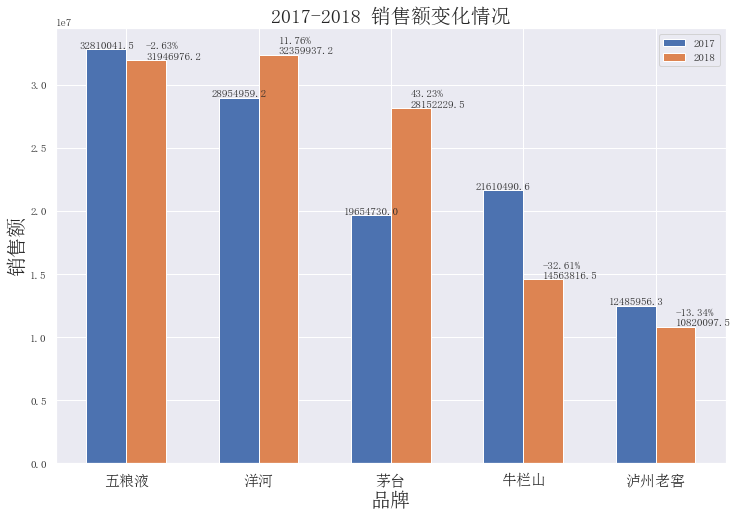

In [78]:
import seaborn as sns

# 各品牌酒销售额变化情况
plt.figure(figsize=(12,8))

sns.set(font='simsun')

colors = []
for i in range(5):
    colors.append((np.random.ranf(1)[0],np.random.ranf(1)[0],np.random.ranf(1)[0]))

# for i in range(len(sales_by_year_top5)):
#     y = sales_by_year_top5.iloc[i,:].loc['销售额',:]
#     plt.plot(x,y,linewidth=6,linestyle='-',color=colors[i], label=sales_by_year_top5.index[i]) 

# y = '总销售额'
# y = [sales_by_year_top5.loc[:,'年销售额'].loc[:,2017].values,sales_by_year_top5.loc[:,'年销售额'].loc[:,2018].values]

# y = sales_by_year_top5_copy.loc['年销售额']

# print(y,y.dtypes)

position = np.array([*range(5)])

bar_width=0.3

print(position)

# for i in range(5):
# sns.barplot(x,sales_by_year_top5.loc[:,y].loc[:,2017].values,data=sales_by_year_top5.reset_index())
# sns.barplot(x,sales_by_year_top5.loc[:,y].loc[:,2018].values,data=sales_by_year_top5.reset_index())
# sns.barplot(x,y,data=sales_by_year_top5_copy, hue=sales_by_year_top5_copy.loc[:,'年份'])
# max_2017 = sales_by_year_top5.loc[:,('年销售额',2017)].max()
# max_2018 = sales_by_year_top5.loc[:,('年销售额',2018)].max()

# max = max_2017 if (max_2017 > max_2018) else max_2018

sales_2017 = sales_by_year_top5.loc[:,'年销售额2017'].values.reshape(-1)
sales_2018 = sales_by_year_top5.loc[:,'年销售额2018'].values.reshape(-1)
plt.bar(position - bar_width / 2, height=sales_2017, label='2017', width=bar_width)
plt.bar(position + bar_width / 2, height=sales_2018, label='2018', width=bar_width)

# for i in range(len(sales_by_year_top5)):
#     plt.bar(position[i] - bar_width / 2, height=sales_by_year_top5.iloc[i,:].loc['年销量',[2017]], label='{}2017'.format(sales_by_year_top5.reset_index().loc[:,'品牌'][i]), width=bar_width)
#     plt.bar(position[i] + bar_width / 2, height=sales_by_year_top5.iloc[i,:].loc['年销量',[2018]], label='{}2018'.format(sales_by_year_top5.reset_index().loc[:,'品牌'][i]), width=bar_width)

for a,b in zip(position,sales_2017):
    plt.text(a - bar_width/2, b+0.05, '%.1f' % b, ha='center', va= 'bottom',fontsize=11)

for a,b,c in zip(position,sales_2018,sales_by_year_top5.loc[:,'销售额同比'].values.reshape(-1)):
    plt.text(a + bar_width/2, b+0.05, '{:.2f}%\n{:.1f}'.format(c*100, b), ha='left', va= 'bottom',fontsize=11)

# for p in position:
#     plt.text(p, -0.05, sales_by_year_top5.reset_index().loc[:,'品牌'][p], ha='center', va='bottom', fontsize=15)

plt.xticks(position,sales_by_year_top5.reset_index().loc[:,'品牌'],rotation=0, fontsize=15)

plt.legend(loc='best')

plt.title('2017-2018 销售额变化情况',fontproperties=font,fontsize=20)
plt.xlabel('品牌',fontproperties=font,fontsize=20)
plt.ylabel('销售额',fontproperties=font,fontsize=20)

plt.savefig(r'.\charts\2017-2018 销售额变化情况.jpg')
plt.show()  

In [72]:
'{:.2f}%'.format(0.3333)

'0.33%'

In [56]:
sales_by_year_top5.loc[:,'销售额同比'].values.reshape(-1)

array([-0.02630491,  0.11759568,  0.43233865, -0.32607655, -0.1334186 ])

<Figure size 864x576 with 0 Axes>

[0 1 2 3 4]


<BarContainer object of 5 artists>

<BarContainer object of 5 artists>

Text(-0.15, 255986.05, '255986.0')

Text(0.85, 158529.05, '158529.0')

Text(1.85, 107282.05, '107282.0')

Text(2.85, 248719.05, '248719.0')

Text(3.85, 101929.05, '101929.0')

Text(0.15, 233895.05, '-8.63%\n233895.0')

Text(1.15, 124526.05, '-21.45%\n124526.0')

Text(2.15, 119928.05, '11.79%\n119928.0')

Text(3.15, 137555.05, '-44.69%\n137555.0')

Text(4.15, 63864.05, '-37.34%\n63864.0')

([<matplotlib.axis.XTick at 0x1d8fed4ed08>,
 [Text(0, 0, '五粮液'),
  Text(1, 0, '洋河'),
  Text(2, 0, '茅台'),
  Text(3, 0, '牛栏山'),
  Text(4, 0, '泸州老窖')])

Text(0.5, 1.0, '2017-2018 销量变化情况')

Text(0.5, 0, '品牌')

Text(0, 0.5, '销量')

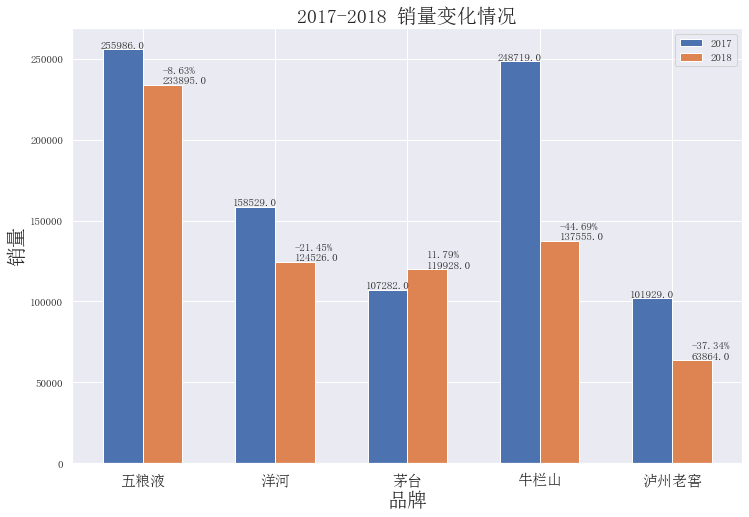

In [79]:
import seaborn as sns

# 各品牌酒销售额变化情况
plt.figure(figsize=(12,8))

sns.set(font='simsun')

colors = []
for i in range(5):
    colors.append((np.random.ranf(1)[0],np.random.ranf(1)[0],np.random.ranf(1)[0]))

position = np.array([*range(5)])

bar_width=0.3

print(position)

vol_2017 = sales_by_year_top5.loc[:,'年销量2017'].values.reshape(-1)
vol_2018 = sales_by_year_top5.loc[:,'年销量2018'].values.reshape(-1)

plt.bar(position - bar_width / 2, height=vol_2017, label='2017', width=bar_width)
plt.bar(position + bar_width / 2, height=vol_2018, label='2018', width=bar_width)

# for i in range(len(sales_by_year_top5)):
#     plt.bar(position[i] - bar_width / 2, height=sales_by_year_top5.iloc[i,:].loc['年销量',[2017]], label='{}2017'.format(sales_by_year_top5.reset_index().loc[:,'品牌'][i]), width=bar_width)
#     plt.bar(position[i] + bar_width / 2, height=sales_by_year_top5.iloc[i,:].loc['年销量',[2018]], label='{}2018'.format(sales_by_year_top5.reset_index().loc[:,'品牌'][i]), width=bar_width)

for a,b in zip(position,vol_2017):
    plt.text(a - bar_width/2, b+0.05, '%.1f' % b, ha='center', va= 'bottom',fontsize=11)

for a,b,c in zip(position,vol_2018, sales_by_year_top5.loc[:,'销量同比'].values.reshape(-1)):
    plt.text(a + bar_width/2, b+0.05, '{:.2f}%\n{:.1f}'.format(c*100, b), ha='left', va= 'bottom',fontsize=11)

plt.xticks(position,sales_by_year_top5.reset_index().loc[:,'品牌'],rotation=0, fontsize=15)

plt.legend(loc='best')

plt.title('2017-2018 销量变化情况',fontproperties=font,fontsize=20)
plt.xlabel('品牌',fontproperties=font,fontsize=20)
plt.ylabel('销量',fontproperties=font,fontsize=20)

plt.savefig(r'.\charts\2017-2018 销量变化情况.jpg')
plt.show()  

In [141]:
# sales_by_year_top5.loc[:,'年销量'].reset_index()[[2018]].values.reshape(-1)
sales_by_year_top5


评论数                 年销量                    年销售额                \
年份        2017      2018      2017      2018          2017          2018   
品牌                                                                         
五粮液   435353.0  136056.0  255986.0  233895.0  3.281004e+07  3.194698e+07   
洋河    298495.0   91731.0  158529.0  124526.0  2.895496e+07  3.235994e+07   
茅台    230477.0   75702.0  107282.0  119928.0  1.965473e+07  2.815223e+07   
牛栏山   214954.0   77122.0  248719.0  137555.0  2.161049e+07  1.456382e+07   
泸州老窖  199757.0   51871.0  101929.0   63864.0  1.248596e+07  1.082010e+07   

              总销售额       总销量     销售额同比      销量同比  
年份                                                
品牌                                                
五粮液   6.475702e+07  489881.0 -0.026305 -0.086298  
洋河    6.131490e+07  283055.0  0.117596 -0.214491  
茅台    4.780696e+07  227210.0  0.432339  0.117876  
牛栏山   3.617431e+07  386274.0 -0.326077 -0.446946  
泸州老窖  2.330605e+07  165793.0 -0.133419 -0.373446

In [102]:
# sales_by_year_top5.iloc[0,:].loc['年销量',2017]
# sales_by_year_top5.loc[:,'年销量'].reset_index().loc[:,[2017]]

sales_by_year_top5.reset_index().loc[:,'品牌'][0]

'五粮液'

In [70]:
max_2017 = sales_by_year_top5.loc[:,('年销量',2017)].max()
max_2018 = sales_by_year_top5.loc[:,('年销量',2018)].max()

max = max_2017 if (max_2017 > max_2018) else max_2018
max

255986.0

In [188]:
sales_by_year_top5.loc[:,y].loc[:,2017].values
sales_by_year_top5.loc[:,y].columns.values

array([32810041.46985482, 28954959.18024108, 19654730.02418694,
       21610490.60645511, 12485956.25965558])

array([2017, 2018], dtype=object)

In [ ]:
# 各品牌酒2017~2018总销量和总销售额



In [95]:
sales_by_year_top5.iloc[0,:]

      年份  
销售额   2017     22908781.0
      2018    120593497.2
总销售额          143502278.2
Name: 茅台, dtype: float64

In [12]:
# sales_by_month = pd.read_excel('Top5品牌月度销售额数据.xlsx',header=[*range(3)])
sales_by_month = pd.read_excel(r'.\data\Top5品牌月度销售额数据.xlsx', skiprows = 3)
sales_by_month.head()

D:\Users\Xiaoming\Anaconda3\lib\site-packages\xlrd\xlsx.py:266: PendingDeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():


,品牌,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,五粮液,19860.0,16767.0,27701.0,59453.0,33421.0,98784.0,129861.0,104034.0,2.27083e+06,2.30571e+06,3.362963e+06,8.098768e+06,4.325954e+06,1.244582e+07,1.753586e+07,1.441112e+07,6.524690e+07
1,洋河,15037.0,24197.0,12843.0,25895.0,20149.0,60408.0,55292.0,69234.0,2.18779e+06,3.78468e+06,2.032719e+06,4.910507e+06,3.156795e+06,1.288247e+07,1.384891e+07,1.851102e+07,6.159795e+07
2,茅台,6202.0,8932.0,8344.0,18938.0,17248.0,47618.0,50515.0,69413.0,1.14838e+06,1.61818e+06,1.505081e+06,3.933550e+06,3.170167e+06,8.279379e+06,1.166618e+07,1.648605e+07,4.803417e+07
3,牛栏山,16873.0,23801.0,20921.0,41326.0,39557.0,106241.0,72014.0,65541.0,1.28182e+06,1.89907e+06,1.735356e+06,3.975668e+06,3.313437e+06,9.405142e+06,6.884137e+06,7.679679e+06,3.656058e+07
4,泸州老窖,8884.0,12188.0,9883.0,18412.0,14867.0,37695.0,38441.0,25423.0,1.04305e+06,1.2935e+06,9.795085e+05,2.349424e+06,1.629183e+06,5.191288e+06,5.931027e+06,4.889070e+06,2.347185e+07


In [5]:
sales_by_month.columns[1:]

Index(['Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', '总销售额'],
      dtype='object')

In [6]:
# sales_by_month.columns.values
# sales_by_month.loc[:,sales_by_month.columns.values]
sales_by_month['总销售额'] = sales_by_month.sum(axis=1)

sales_by_month_top5 = sales_by_month.sort_values('总销售额', ascending=False).iloc[range(5),-9:-1]
# sales_by_month_top5 = sales_by_month.sort_values('总销售额', ascending=False).iloc[range(5),:]
sales_by_month_top5

,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,2.305707e+06,3.362963e+06,8.098768e+06,4.325954e+06,1.244582e+07,1.753586e+07,1.441112e+07,6.524690e+07
1,3.784685e+06,2.032719e+06,4.910507e+06,3.156795e+06,1.288247e+07,1.384891e+07,1.851102e+07,6.159795e+07
2,1.618178e+06,1.505081e+06,3.933550e+06,3.170167e+06,8.279379e+06,1.166618e+07,1.648605e+07,4.803417e+07
3,1.899068e+06,1.735356e+06,3.975668e+06,3.313437e+06,9.405142e+06,6.884137e+06,7.679679e+06,3.656058e+07
4,1.293498e+06,9.795085e+05,2.349424e+06,1.629183e+06,5.191288e+06,5.931027e+06,4.889070e+06,2.347185e+07


In [46]:
[item[2] for item in sales_by_month_top5.columns.values]

[5, 7, 8, 9, 11, 12, 1]

In [17]:
sales_by_month_top5.reset_index().iloc[:,0].values

array(['五粮液', '洋河', '茅台', '牛栏山', '泸州老窖'], dtype=object)

In [46]:
# sales_by_month_top5.head()
['{}.{}'.format(i[1],i[2]) for i in sales_by_month_top5.columns.values]

['2017.5',
 '2017.7',
 '2017.8',
 '2017.9',
 '2017.11',
 '2017.12',
 '2018.1',
 '2018.2']

In [23]:
sales_by_month_top5.index.values

array(['五粮液', '洋河', '茅台', '牛栏山', '泸州老窖'], dtype=object)

<Figure size 864x576 with 0 Axes>

<AxesSubplot:ylabel='五粮液'>

<AxesSubplot:ylabel='洋河'>

<AxesSubplot:ylabel='茅台'>

<AxesSubplot:ylabel='牛栏山'>

<AxesSubplot:ylabel='泸州老窖'>

No handles with labels found to put in legend.


([<matplotlib.axis.XTick at 0x12bfd37aec8>,
 [Text(0, 0, '2017.5'),
  Text(1, 0, '2017.7'),
  Text(2, 0, '2017.8'),
  Text(3, 0, '2017.9'),
  Text(4, 0, '2017.11'),
  Text(5, 0, '2017.12'),
  Text(6, 0, '2018.1'),
  Text(7, 0, '2018.2')])

Text(0.5, 0, '月份')

Text(0, 0.5, '销售额')

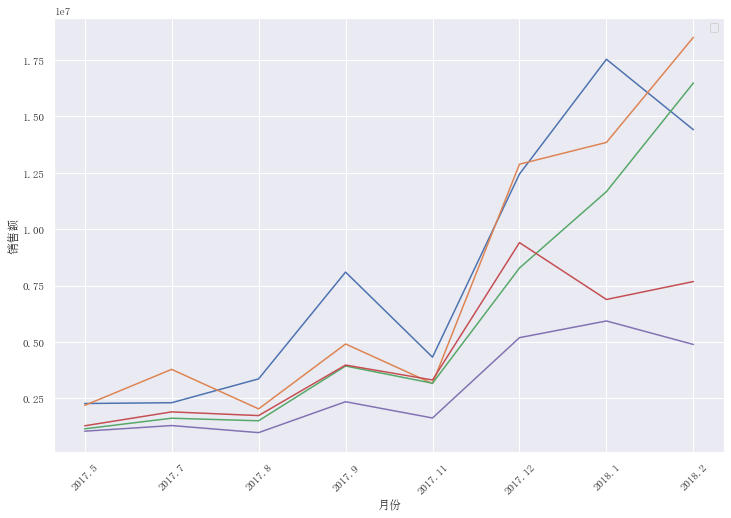

In [55]:
# Top5品牌按月的销量、销售额变化情况（折线图）

import seaborn as sns

sns.set(font='simsun', style='darkgrid')

plt.figure(figsize=(12,8))

position = [*range(len(sales_by_month_top5.columns))]

for i in range(len(sales_by_month_top5)):
    # sns.lineplot(data=sales_by_month_top5, x=[*range(8)],y=sales_by_month_top5.iloc[i,sales_by_month_top5.columns.values], hue=sales_by_month_top5.index.values)
    sns.lineplot(data=sales_by_month_top5, x=position ,y=sales_by_month_top5.iloc[i,:])

plt.legend()
plt.xticks(position, ['{}.{}'.format(j[1],j[2]) for j in sales_by_month_top5.columns.values], rotation=45)
plt.xlabel('月份')
plt.ylabel('销售额')

plt.savefig(r'.\charts\Top5品牌月度销售额变化情况.jpeg',)

plt.show()

#是否有季节性、随机、周期性、趋势等等变化？（数据不够，只有2017.5到2018.2的数据，无法判断是否有季节性和周期性）
# 尝试用拟合曲线来拟合时间序列

## 线性回归预测月销量

In [23]:
# 准备数据
sales_by_month_top = sales_by_month_top5.iloc[0,:]

years = [2017,2018]
months = [5,*range(7,10),11,12,1,2]

years_and_months = []
for m in months:
    if(months.index(m) <= months.index(12)):
        ym = '.'.join([str(years[0]),str(m)])
    else:
        ym = '.'.join([str(years[1]),str(m)])
    years_and_months.append(ym)

years_and_months

['2017.5',
 '2017.7',
 '2017.8',
 '2017.9',
 '2017.11',
 '2017.12',
 '2018.1',
 '2018.2']

In [141]:
sales_by_month_top.index = years_and_months

# sales_by_month_top.set_index(sales_by_month_top.index, name='months')
sales_by_month_top.index.name = 'months'

sales_by_month_top.rename('sales of {:s} by month'.format(sales_by_month_top5.index.values[0]))

ValueError: Unknown format code 's' for object of type 'int'

In [15]:
'.'.join(['s','sss'])

's.sss'

In [56]:
values = zip([*range(10)], [*range(10,20)])

for v1,v2 in values:
    print(v1,v2)

0 10
1 11
2 12
3 13
4 14
5 15
6 16
7 17
8 18
9 19


In [83]:
import warnings
warnings.filterwarnings("ignore")#忽略警告

from sklearn import linear_model
lr = linear_model.LinearRegression()

X = np.array([*range(len(sales_by_month_top))]).reshape(-1,1) # 需要二维数组
y = sales_by_month_top.values.reshape(-1,1)

lr.fit(X,y)

predicted = lr.predict(np.array([*range(len(sales_by_month_top) + 1)]).reshape(-1,1)) # 预测2018.3的销售额

predicted

array([[-6210874.83890303],
       [  125556.67425377],
       [ 6461988.18741056],
       [12798419.70056735],
       [19134851.21372415],
       [25471282.72688094],
       [31807714.24003774],
       [38144145.75319453],
       [44480577.26635133]])

In [73]:
predicted[-1][0]

38144145.753194526

In [82]:
y = sales_by_month_top[0:].values.tolist()

y.append(predicted[-1][0])
y

[2305707.0101353,
 3362963.305618696,
 8098767.997859774,
 4325954.243891756,
 12445816.18090528,
 17535858.61080443,
 14411117.61364575,
 65246898.69430502,
 38144145.753194526]

In [81]:
x = sales_by_month_top.index.values.tolist()

x.append('2018.3')
x

['2017.5',
 '2017.7',
 '2017.8',
 '2017.9',
 '2017.11',
 '2017.12',
 '2018.1',
 '2018.2',
 '2018.3']

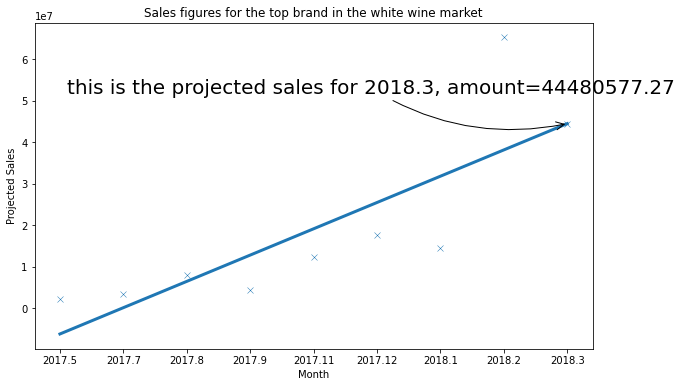

In [143]:
plt.figure(figsize=(10,6))

X = sales_by_month_top.index.values.tolist()

X.append('2018.3')

y = sales_by_month_top[0:].values.tolist()

y.append(predicted[-1][0])

plt.scatter(X,y,marker='x', linewidths=.5)

plt.plot(X,predicted, linewidth=3)

position = [*range(len(sales_by_month_top.columns) + 1)]

plt.xticks(position,X)

plt.xlabel('Month')
plt.ylabel('Projected Sales')

plt.annotate(r'this is the projected sales for 2018.3, amount={:.2f}'.format(y[-1]), xy=(x[-1], y[-1]),xycoords='data', xytext=(-500, +30),textcoords='offset points', fontsize=20,arrowprops=dict(arrowstyle='->', connectionstyle="arc3,rad=.2"))
# plt.yticks()

plt.title('Sales figures for the top brand in the white wine market')
plt.show()

# 岭回归

In [109]:
from sklearn.model_selection import GridSearchCV

Ridge = linear_model.Ridge()
# Ridge = linear_model.ridge_regression()

# alpha = [0.001,0.01,0.1,1,10,100]
params = {'alpha': [0.0001,0.001,0.01,0.1,1,10,100]}

gs = GridSearchCV(Ridge,cv=len(sales_by_month_top), param_grid=params, verbose=2, n_jobs = -1)

X = np.array([*range(len(sales_by_month_top))]).reshape(-1,1)
y = sales_by_month_top.values.reshape(-1,1)

gs.fit(X,y)

gs.best_params_


Fitting 8 folds for each of 7 candidates, totalling 56 fits


{'alpha': 0.0001}

In [138]:
# 预测2018年3~6月的销量
predicted_ridge = gs.predict(np.array([*range(len(sales_by_month_top) + 4)]).reshape(-1,1))

len(predicted_ridge)


12

In [137]:
X = sales_by_month_top.index.values.tolist()

for i in ['2018.3','2018.4','2018.5','2018.6']:
    X.append(i)

len(X)

12

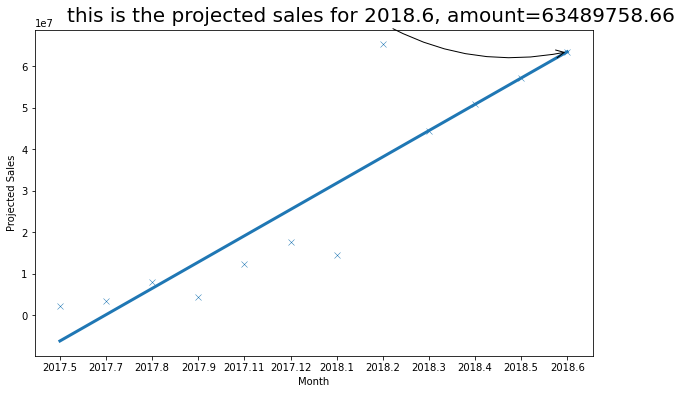

In [147]:
plt.figure(figsize=(10,6))

X = sales_by_month_top.index.values.tolist()

for i in ['2018.3','2018.4','2018.5','2018.6']:
    X.append(i)

y = sales_by_month_top[0:].values.tolist()

for i in predicted_ridge[-4:]:
    y.append(i[0])

plt.scatter(X,y,marker='x', linewidths=.5)

plt.plot(X,predicted_ridge, linewidth=3)

position = [*range(len(X))]

plt.xticks(position,X)

plt.xlabel('Month')
plt.ylabel('Projected Sales')

plt.annotate(r'this is the projected sales for {:s}, amount={:.2f}'.format(X[-1],y[-1]), xy=(X[-1], y[-1]),xycoords='data', xytext=(-500, +30),textcoords='offset points', fontsize=20,arrowprops=dict(arrowstyle='->', connectionstyle="arc3,rad=.2"))
# plt.yticks()

os.chdir('.')
plt.savefig(r'.\charts\Top1品牌白酒月度销量预测.jpg')
plt.show()

## 广告词词云图

In [145]:
from wordcloud import WordCloud,STOPWORDS
import jieba

C:\Users\lixia\AppData\Roaming\Python\Python37\site-packages\wordcloud\wordcloud.py:35: ResourceWarning: unclosed file <_io.TextIOWrapper name='C:\\Users\\lixia\\AppData\\Roaming\\Python\\Python37\\site-packages\\wordcloud\\stopwords' mode='r' encoding='cp936'>
  STOPWORDS = set(map(str.strip, open(os.path.join(FILE, 'stopwords')).readlines()))


In [146]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8132 entries, 0 to 8131
Data columns (total 12 columns):
Unnamed: 0    8132 non-null int64
商品名称          8132 non-null object
价格（元）         8132 non-null float64
近30天销量（件）     8132 non-null int64
广告词           4720 non-null object
促销活动          4146 non-null object
评论数           8132 non-null int64
日期            8132 non-null datetime64[ns]
品牌            8132 non-null object
销售额           8132 non-null float64
年份            8132 non-null int64
月份            8132 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(5), object(4)
memory usage: 762.5+ KB


In [165]:
top5 = data2.set_index('品牌').loc[sales_by_year_top5.index.values,:]

In [168]:
# Top5品牌广告词
adwords = top5.reset_index()['广告词'].dropna()

adwords

1             需要多个 礼品袋 请拍2瓶装
3                  口感细腻，酒体丰厚
4       2件送1件礼袋，多个礼袋分开下单赠完即止
6                  大家风范 系出名门
8                 需要礼袋 请拍双只装
                ...         
3742          天猫自营 酒厂直供 正品保障
3743               此酒不搭赠 礼品袋
3750               天猫自营 酒厂直供
3752         大容量 钜惠装 下单立减30元
3754               头曲钜惠装，大容量
Name: 广告词, Length: 1930, dtype: object

In [169]:
text = adwords.str.cat()

In [171]:
#分词

sep_words = jieba.lcut(text)

In [154]:
stopwords=pd.read_csv(r'C:\Users\lixia\iCloudDrive\Documents\CDA数据分析师\Python机器学习\12、电商文本挖掘\停用词.csv')
stop_list = stopwords['停用词'].tolist()#转换为列表
stop_list.append(' ')

In [172]:
# 去停用词
split_words = [x for x in sep_words if x not in stop_list]

In [173]:
import collections
# dir(collections)
collections.Counter(split_words).most_common(20)

[('礼袋', 509),
 ('地道', 391),
 ('北京', 391),
 ('牛栏山', 389),
 ('正宗', 379),
 ('味', 371),
 ('请', 334),
 ('拍', 271),
 ('送', 246),
 ('多个', 205),
 ('分开', 173),
 ('天猫', 170),
 ('超市', 168),
 ('自营', 152),
 ('瓶', 150),
 ('订单', 144),
 ('下单', 142),
 ('需', 141),
 ('保证', 126),
 ('活动', 121)]

<Figure size 720x432 with 0 Axes>

(-0.5, 999.5, 699.5, -0.5)

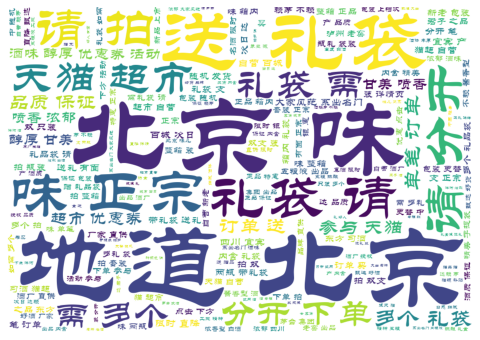

In [174]:
plt.figure(figsize=(10,6))
STOPWORDS.add('牛栏山')
STOPWORDS.add('瓶')
# STOPWORDS.add('味')
# STOPWORDS.add('请')
# STOPWORDS.add('拍')
# STOPWORDS.add('请')
# STOPWORDS.add('送')
# STOPWORDS.add('瓶')
# STOPWORDS.add('瓶')
newtxt = ' '.join(split_words)
w = WordCloud(width=1000,height=700,font_path="C:/Windows/Fonts/STLITI.ttf",background_color = 'white',stopwords=STOPWORDS)
wc = w.generate(newtxt)
plt.imshow(wc)
plt.axis('off')

<Figure size 720x432 with 0 Axes>

(-0.5, 499.5, 332.5, -0.5)

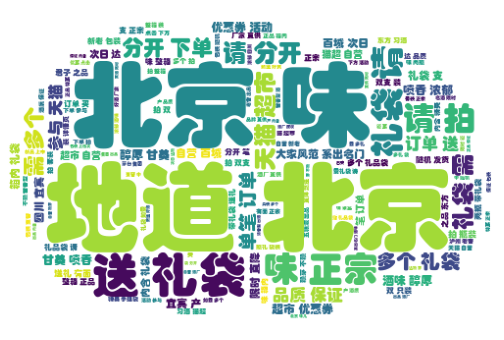

In [177]:
plt.figure(figsize=(10,6))
bgd = plt.imread(r'C:\Users\lixia\iCloudDrive\Documents\CDA数据分析师\Python机器学习\12、电商文本挖掘\mask.jpg')
w = WordCloud(width=1000,height=700,font_path="C:/Windows/Fonts/STHUPO.TTF",background_color = 'white',stopwords=STOPWORDS, mask=bgd)
wc = w.generate(newtxt)
plt.imshow(wc)
plt.axis('off')

<Figure size 720x432 with 0 Axes>

(-0.5, 799.5, 632.5, -0.5)

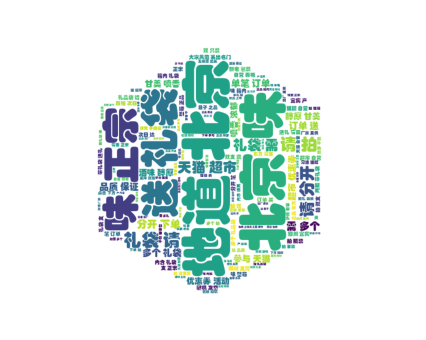

In [179]:
plt.figure(figsize=(10,6))
bgd = plt.imread(r'C:\Users\lixia\iCloudDrive\Documents\CDA数据分析师\Python机器学习\12、电商文本挖掘\mask1.jpg')
w = WordCloud(width=1000,height=700,font_path="C:/Windows/Fonts/STHUPO.TTF",background_color = 'white',stopwords=STOPWORDS, mask=bgd)
wc = w.generate(newtxt)
plt.imshow(wc)
plt.axis('off')